In [1]:
# Import libraries and read in the csv that was created with the notebook "Preprocessed_Data_Locationtype_Season_Added.ipynb". Therefore use the correct folder path.
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib.pyplot import figure

df = pd.read_csv('/Users/theres/Downloads/Data-Science-Group-4/data/preprocessed/data_location_type_season_added.csv')

/Users/theres/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [172]:
df

Crime ID       Month  \
0                                                      NaN  2021-06-01   
1                                                      NaN  2021-06-01   
2                                                      NaN  2021-06-01   
3        69739dcc3580a6a58699ba4aeaa4b43c01d5a20c4b4a95...  2021-06-01   
4        e9243631051c322e261ac7278695cd3ec957d9d055cd47...  2021-06-01   
...                                                    ...         ...   
1182889                                                NaN  2021-08-01   
1182890                                                NaN  2021-08-01   
1182891                                                NaN  2021-08-01   
1182892                                                NaN  2021-08-01   
1182893                                                NaN  2021-08-01   

                         Reported by                 Falls within  Longitude  \
0        Metropolitan Police Service  Metropolitan Police Service   0.140035   
1        Metropolitan Police Service  Metropolitan Police Service   0.137065   
2        Metropolitan Police Service  Metropolitan Police Service   0.134947   
3        Metropolitan Police Service  Metropolitan Police Service   0.135866   
4        Metropolitan Police Service  Metropolitan Police Service   0.140634   
...                              ...                          ...        ...   
1182889     British Transport Police     British Transport Police  -0.133463   
1182890     British Transport Police     British Transport Police  -0.505346   
1182891     British Transport Police     British Transport Police  -0.505346   
1182892     British Transport Police     British Transport Police  -0.505346   
1182893     British Transport Police     British Transport Police  -0.505346   

          Latitude                           Location  LSOA code  \
0        51.589112         On or near Beansland Grove  E01000027   
1        51.583672          On or near Police Station  E01000027   
2        51.588063              On or near Mead Grove  E01000027   
3        51.587336         On or near Gibbfield Close  E01000027   
4        51.583427              On or near Rams Grove  E01000027   
...            ...                                ...        ...   
1182889  51.489300    On or near Pimlico (Lu Station)  E01004741   
1182890  51.339500  On or near West Byfleet (Station)  E01031004   
1182891  51.339500  On or near West Byfleet (Station)  E01031004   
1182892  51.339500  On or near West Byfleet (Station)  E01031004   
1182893  51.339500  On or near West Byfleet (Station)  E01031004   

                         LSOA name                    Crime type  \
0        Barking and Dagenham 001A         Anti-social behaviour   
1        Barking and Dagenham 001A         Anti-social behaviour   
2        Barking and Dagenham 001A         Anti-social behaviour   
3        Barking and Dagenham 001A                      Burglary   
4        Barking and Dagenham 001A                      Burglary   
...                            ...                           ...   
1182889           Westminster 024F  Violence and sexual offences   
1182890                Woking 002E                 Bicycle theft   
1182891                Woking 002E                 Bicycle theft   
1182892                Woking 002E     Criminal damage and arson   
1182893                Woking 002E                   Other theft   

                                 Last outcome category  Context  \
0                                                  NaN      NaN   
1                                                  NaN      NaN   
2                                                  NaN      NaN   
3        Investigation complete; no suspect identified      NaN   
4        Investigation complete; no suspect identified      NaN   
...                                                ...      ...   
1182889                                            NaN      NaN   
1182890                       

In [131]:
# Analysis on crime types

In [96]:
# Create a pivot table showing the total number of crimes by month 
df_pivot_month = pd.pivot_table(df, values='Reported by' , index='Month', aggfunc='count')
df_pivot_month

Reported by
Month                  
2020-11-01        98167
2020-12-01        89050
2021-01-01        85564
2021-02-01        80651
2021-03-01        92349
2021-04-01        87737
2021-05-01        92700
2021-06-01        96262
2021-07-01        95742
2021-08-01        89500
2021-09-01        91166
2021-10-01        93986
2021-11-01        90020

In [100]:
# Calculate the average crime counts per month
df_pivot_month.mean()

Reported by    90991.846154
dtype: float64

In [99]:
df_pivot_month.median()

Reported by    91166.0
dtype: float64

In [101]:
df_pivot = df_pivot.reset_index()

In [103]:
# Import Matplot library to display plots.
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20,15)

<ipython-input-104-e5de3ad86d56>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.bar(df_pivot['Month'], df_pivot['Reported by'], Width =0.8)


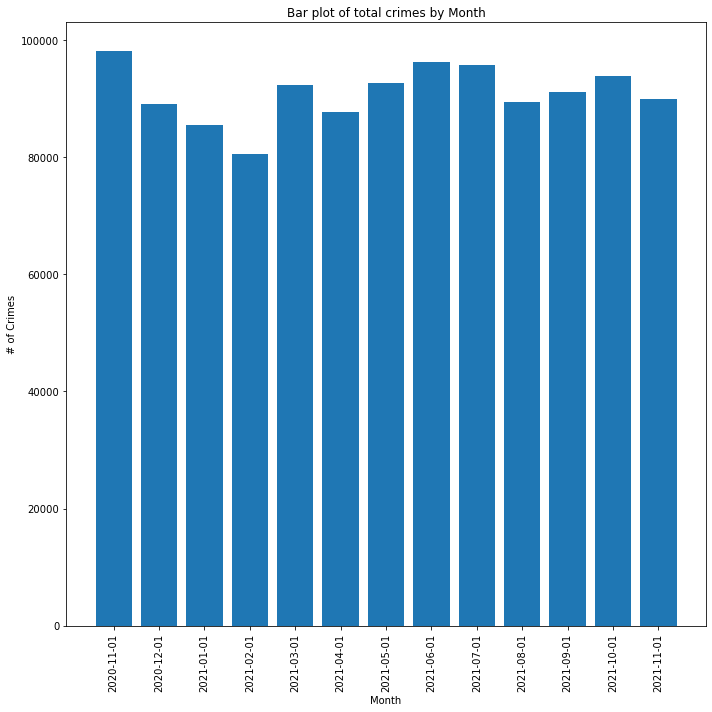

In [104]:
# Create a bar chart of the numbers of crimes per month
plt.figure(figsize=(10,10))
plt.bar(df_pivot['Month'], df_pivot['Reported by'], Width =0.8)
plt.ylabel("# of Crimes")
plt.xlabel("Month")
plt.xticks(rotation=90)
plt.title("Bar plot of total crimes by Month")

plt.show()

In [105]:
# Create a pivot table showing the total number of crimes by crime type and month 
df_pivot_ct_month = pd.pivot_table(df, values='Reported by', index='Month', columns='Crime type',
                          aggfunc='count')
df_pivot_ct_month

Crime type  Anti-social behaviour  Bicycle theft  Burglary  \
Month                                                        
2020-11-01                  33930           2079      5200   
2020-12-01                  29438           1352      4761   
2021-01-01                  33691           1076      4274   
2021-02-01                  29210           1127      4048   
2021-03-01                  30663           1677      4631   
2021-04-01                  27186           1891      4141   
2021-05-01                  26203           2121      4166   
2021-06-01                  27708           2195      4234   
2021-07-01                  26313           2306      4226   
2021-08-01                  23406           2121      4316   
2021-09-01                  21987           2321      4312   
2021-10-01                  21087           2044      4684   
2021-11-01                  18061           1720      4822   

Crime type  Criminal damage and arson  Drugs  Other crime  Other theft  \
Month                                                                    
2020-11-01                       4336   4562          984         5828   
2020-12-01                       4212   3783          782         6434   
2021-01-01                       3737   3826          744         4889   
2021-02-01                       3674   4185          758         4662   
2021-03-01                       4335   4371          917         5335   
2021-04-01                       4403   3878          883         6178   
2021-05-01                       4785   3514          952         6863   
2021-06-01                       4977   3279          812         8248   
2021-07-01                       4770   3331          901         8413   
2021-08-01                       4625   3232          778         8255   
2021-09-01                       4555   3010          866         9047   
2021-10-01                       4645   3681          952         9383   
2021-11-01                       4563   3673          865         9652   

Crime type  Possession of weapons  Public order  Robbery  Shoplifting  \
Month                                                                   
2020-11-01                    548          4489     2356         2855   
2020-12-01                    415          4117     2060         2755   
2021-01-01                    373          3622     1498         2140   
2021-02-01                    405          3525     1362         2282   
2021-03-01                    429          5148     1667         2521   
2021-04-01                    361          5189     1747         2729   
2021-05-01                    391          5715     1777         3056   
2021-06-01                    416          6040     1910         3026   
2021-07-01                    444          6325     1894         3062   
2021-08-01                    408          5135     1927         3250   
2021-09-01                    409          5424     2227         2786   
2021-10-01                    451          5586     2255         3096   
2021-11-01                    473          5208     2308         2987   

Crime type  Theft from the person  Vehicle crime  Violence and sexual offences  
Month                                                                           
2020-11-01                   2786           9134                         19080  
2020-12-01                   3293           7717                         17931  
2021-01-01                   1733           7647                         16314  
2021-02-01                   1651           7600                         16162  
2021-03-01                   2277           8271                         20107  
2021-04-01                   2673           7065                         19413  
2021-05-01                   3343           7745                         22069  
2021-06-01                   3091           8009                         22317  
2021-07-01                   3410           7640    

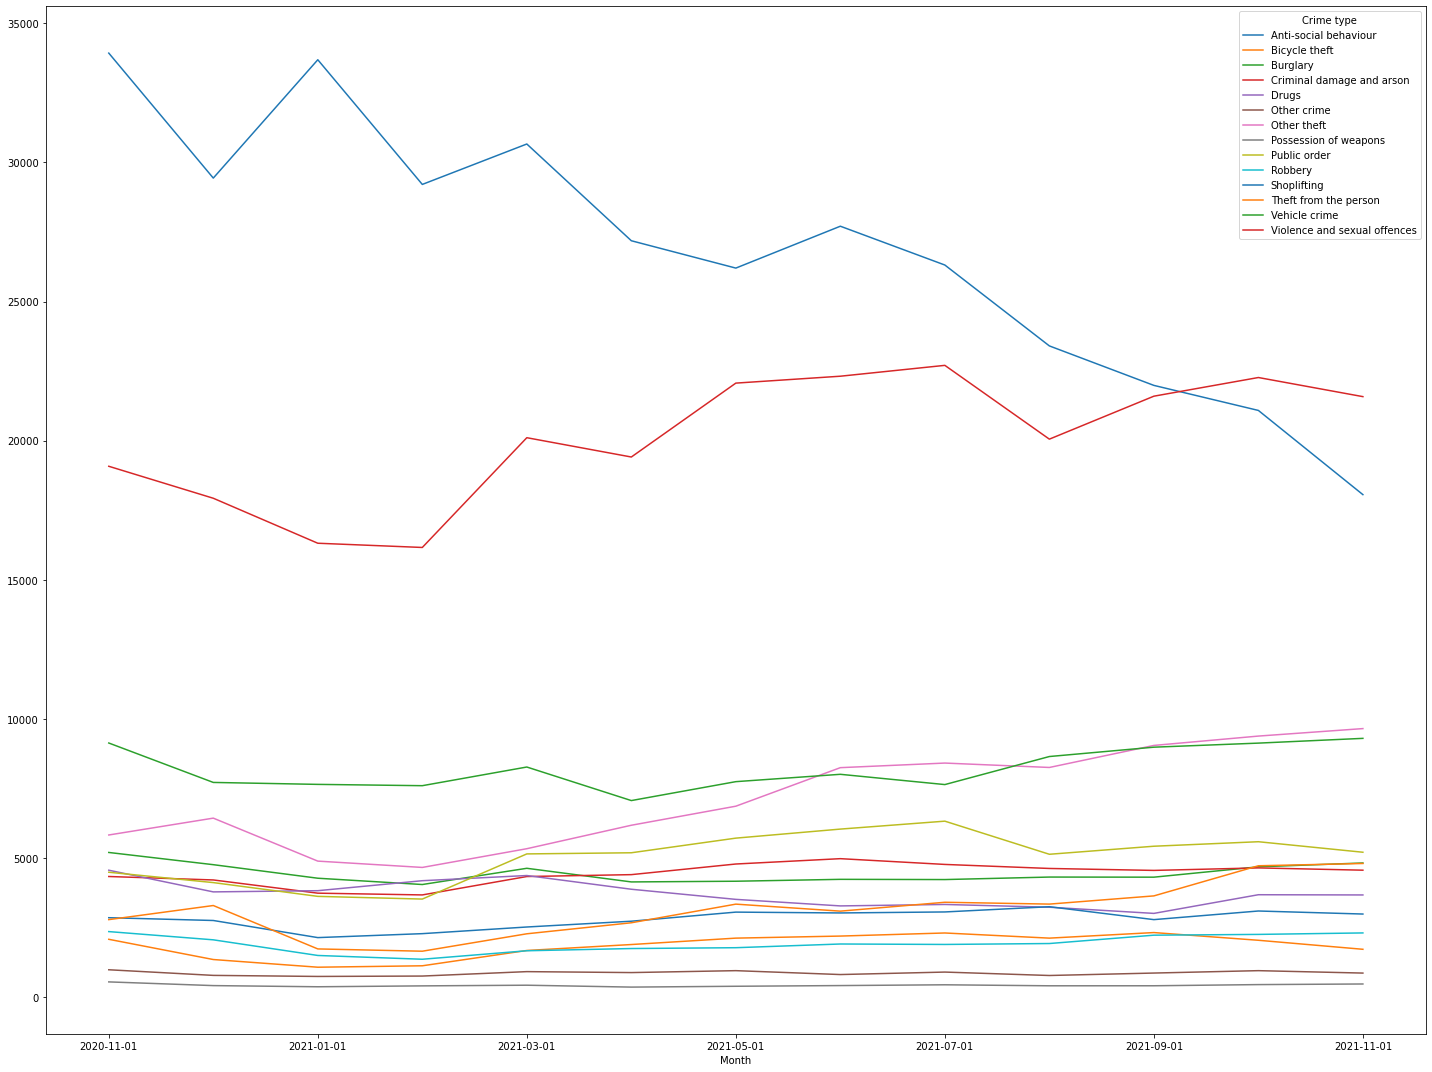

In [106]:
# Create a line chart showing the total number of crimes for each crime type by month

df_pivot_ct_month.plot()

plt.show()

In [2]:
df['Crime type'].value_counts()

Anti-social behaviour           348883
Violence and sexual offences    261607
Vehicle crime                   106891
Other theft                      93187
Public order                     65523
Burglary                         57815
Criminal damage and arson        57617
Drugs                            48325
Theft from the person            40766
Shoplifting                      36545
Robbery                          24988
Bicycle theft                    24030
Other crime                      11194
Possession of weapons             5523
Name: Crime type, dtype: int64

In [55]:
df['Crime type'].value_counts(normalize = True)

Anti-social behaviour           0.294940
Violence and sexual offences    0.221158
Vehicle crime                   0.090364
Other theft                     0.078779
Public order                    0.055392
Burglary                        0.048876
Criminal damage and arson       0.048709
Drugs                           0.040853
Theft from the person           0.034463
Shoplifting                     0.030895
Robbery                         0.021124
Bicycle theft                   0.020315
Other crime                     0.009463
Possession of weapons           0.004669
Name: Crime type, dtype: float64

In [58]:
# Create labels for pie chart on crime types
crime = ['Anti-social behaviour (29.5%)','Violence and sexual offences (22.1%)','Vehicle crime (9.0%)','Other theft (7.9%)','Public order (5.5%)','Burglary (4.9%)','Criminal damage and arson (4.9%)','Drugs (4.1%)','Theft from the person (3.4%)','Shoplifting (3.1%)','Robbery(2.1%)','Bicycle theft (2.0%)','Other crime (0.9%)','Possession of weapons (0.5%)']

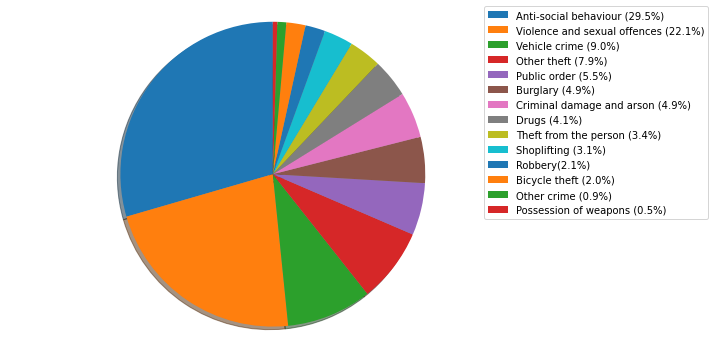

In [62]:
# Plot a pie chart on crime types
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True

labels = crime
sizes =  df['Crime type'].value_counts()

patches, texts = plt.pie(sizes, shadow=True, startangle=90)
plt.legend(patches,labels,bbox_to_anchor=(0.9, 1), loc=2, borderaxespad=0.)
plt.axis('equal')

plt.show()

In [88]:
# Create a table and plot (following) of crime counts by season
season_pivot = pd.pivot_table(df, values='Reported by', index='Season', aggfunc='count')
season_pivot

Reported by
Season             
Fall         283319
Spring       272786
Summer       281504
Winter       255265

In [89]:
season_pivot = season_pivot.reset_index()

<ipython-input-90-af8a7fc0d23c>:2: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.bar(season_pivot['Season'], season_pivot['Reported by'], Width =0.8)


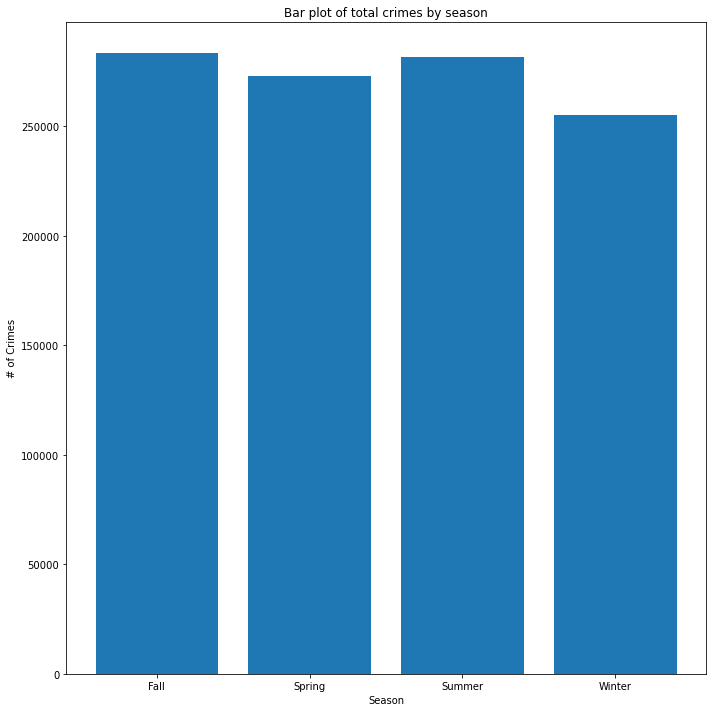

In [90]:
plt.figure(figsize=(10,10))
plt.bar(season_pivot['Season'], season_pivot['Reported by'], Width =0.8)
plt.ylabel("# of Crimes")
plt.xlabel("Season")
plt.title("Bar plot of total crimes by season")

plt.show()

In [107]:
# Create a pivot table of crime types aggregated by season.
df_pivot_crime = pd.pivot_table(df, values='Reported by', index='Season', columns='Crime type', aggfunc='count')
df_pivot_crime

Crime type  Anti-social behaviour  Bicycle theft  Burglary  \
Season                                                       
Fall                        77004           6444     14196   
Spring                      84052           5689     12938   
Summer                      77427           6622     12776   
Winter                      92339           3555     13083   

Crime type  Criminal damage and arson  Drugs  Other crime  Other theft  \
Season                                                                   
Fall                            13536  11253         2802        24258   
Spring                          13523  11763         2752        18376   
Summer                          14372   9842         2491        24916   
Winter                          11623  11794         2284        15985   

Crime type  Possession of weapons  Public order  Robbery  Shoplifting  \
Season                                                                  
Fall                         1408         15499     6838         8737   
Spring                       1181         16052     5191         8306   
Summer                       1268         17500     5731         9338   
Winter                       1193         11264     4920         7177   

Crime type  Theft from the person  Vehicle crime  Violence and sexual offences  
Season                                                                          
Fall                        11147          27248                         62949  
Spring                       8293          23081                         61589  
Summer                       9845          24297                         65079  
Winter                       6677          22964                         50407

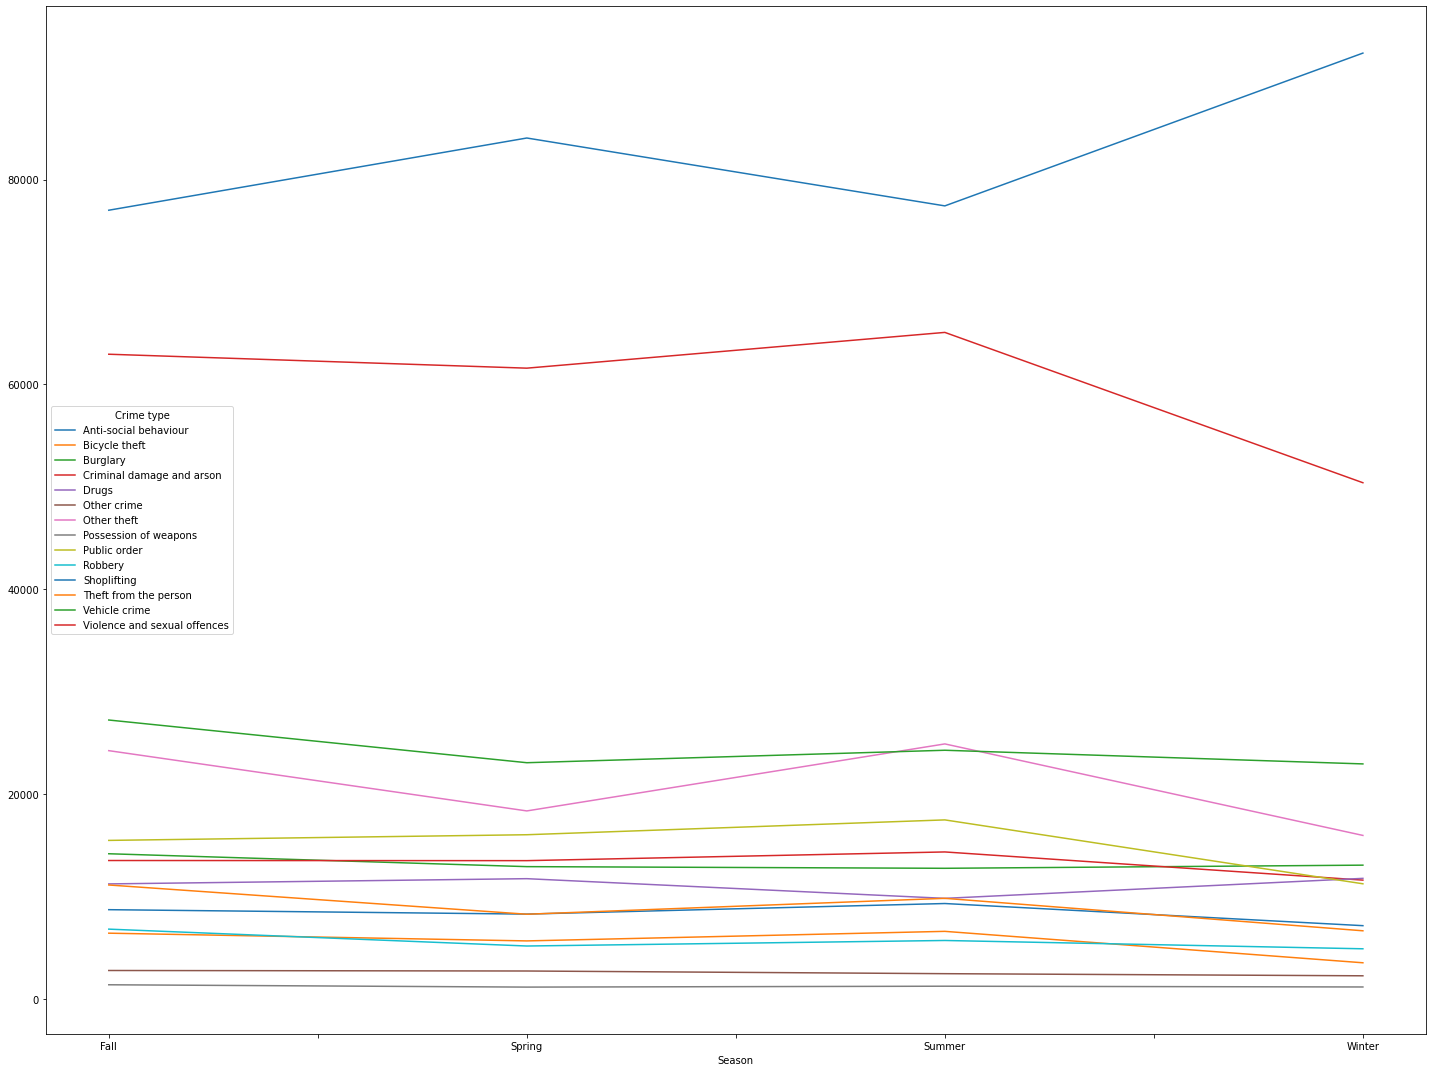

In [110]:
df_pivot_crime.plot()

plt.show()

In [121]:
# Create a new table grouped by season and crime types
table_crime = df.groupby(by=['Season','Crime type']).count()
table_crime

Crime ID  Month  Reported by  \
Season Crime type                                                   
Fall   Anti-social behaviour                0  77004        77004   
       Bicycle theft                     6147   6444         6444   
       Burglary                         14180  14196        14196   
       Criminal damage and arson        13220  13536        13536   
       Drugs                            10980  11253        11253   
       Other crime                       2763   2802         2802   
       Other theft                      23715  24258        24258   
       Possession of weapons             1334   1408         1408   
       Public order                     14551  15499        15499   
       Robbery                           6671   6838         6838   
       Shoplifting                       8632   8737         8737   
       Theft from the person            10425  11147        11147   
       Vehicle crime                    27156  27248        27248   
       Violence and sexual offences     61757  62949        62949   
Spring Anti-social behaviour                0  84052        84052   
       Bicycle theft                     5480   5689         5689   
       Burglary                         12929  12938        12938   
       Criminal damage and arson        13124  13523        13523   
       Drugs                            11376  11763        11763   
       Other crime                       2714   2752         2752   
       Other theft                      17993  18376        18376   
       Possession of weapons             1124   1181         1181   
       Public order                     15239  16052        16052   
       Robbery                           5057   5191         5191   
       Shoplifting                       8217   8306         8306   
       Theft from the person             7810   8293         8293   
       Vehicle crime                    23028  23081        23081   
       Violence and sexual offences     60651  61589        61589   
Summer Anti-social behaviour                0  77427        77427   
       Bicycle theft                     6279   6622         6622   
       Burglary                         12760  12776        12776   
       Criminal damage and arson        14047  14372        14372   
       Drugs                             9634   9842         9842   
       Other crime                       2444   2491         2491   
       Other theft                      24304  24916        24916   
       Possession of weapons             1226   1268         1268   
       Public order                     16439  17500        17500   
       Robbery                           5621   5731         5731   
       Shoplifting                       9236   9338         9338   
       Theft from the person             9190   9845         9845   
       Vehicle crime                    24211  24297        24297   
       Violence and sexual offences     63852  65079        65079   
Winter Anti-social behaviour                0  92339        92339   
       Bicycle theft                     3479   3555         3555   
       Burglary                         13069  13083        13083   
       Criminal damage and arson        11256  11623        11623   
       Drugs                            11351  11794        11794   
       Other crime                       2251   2284         2284   
       Other theft                      15678  15985        15985   
       Possession of weapons             1116   1193         1193   
       Public order                     10657  11264        11264   
       Robbery                           4773   4920         4920   
       Shoplifting                       7111   7177         7177   
       Theft from the person             6191   6677         6677   
       Vehicle crime                    22929  22964        22964   
       Violence and sexual offences     49759  50407        50407   

                                  

In [3]:
# Group dataframe by crime type
crime_grp = df.groupby(['Crime type'])

In [4]:
# Show percantage of locations grouped by crime types
crime_grp['Location type'].value_counts(normalize=True).head(60)

Crime type                 Location type                                 
Anti-social behaviour      On Street                                         0.888848
                           On or near Parking Area                           0.020680
                           On or near Supermarket                            0.020250
                           On or near Sports/Recreation Area                 0.014423
                           On or near Petrol Station                         0.010218
                           On or near Shopping Area                          0.009608
                           On or near Underpass                              0.007676
                           On or near Further/Higher Educational Building    0.004919
                           On or near Theatre/Concert Hall                   0.004663
                           On or near Nightclub                              0.004563
                           On or near Police Station              

In [5]:
# Analysing crime type violence and sexual offences
crime_grp['Location type'].value_counts(normalize=True).loc['Violence and sexual offences']

Location type
On Street                                         0.851961
On or near Supermarket                            0.025672
On or near Parking Area                           0.020546
On or near Sports/Recreation Area                 0.014174
On or near Petrol Station                         0.012068
On or near Shopping Area                          0.011976
On or near Hospital                               0.010042
On or near Train Station/Tram Stop                0.009962
On or near Nightclub                              0.007913
On or near Underpass                              0.007416
On or near London Underground Station             0.007297
On or near Police Station                         0.005600
On or near Further/Higher Educational Building    0.005405
On or near Theatre/Concert Hall                   0.003746
On or near Conference/Exhibition Centre           0.001892
On or near Park/Open Space                        0.001743
On or near Bus/Coach Station              

In [ ]:
# Analysis on location types 

In [111]:
# Create a new table with locations and their total counts
location_type_counts = df['Location type'].value_counts().rename_axis('location').reset_index(name='counts')

In [112]:
location_type_counts.iloc[0:7]

location  counts
0                           On Street  977360
1              On or near Supermarket   40298
2             On or near Parking Area   29104
3            On or near Shopping Area   25116
4           On or near Petrol Station   18966
5   On or near Sports/Recreation Area   15864
6  On or near Train Station/Tram Stop   11177

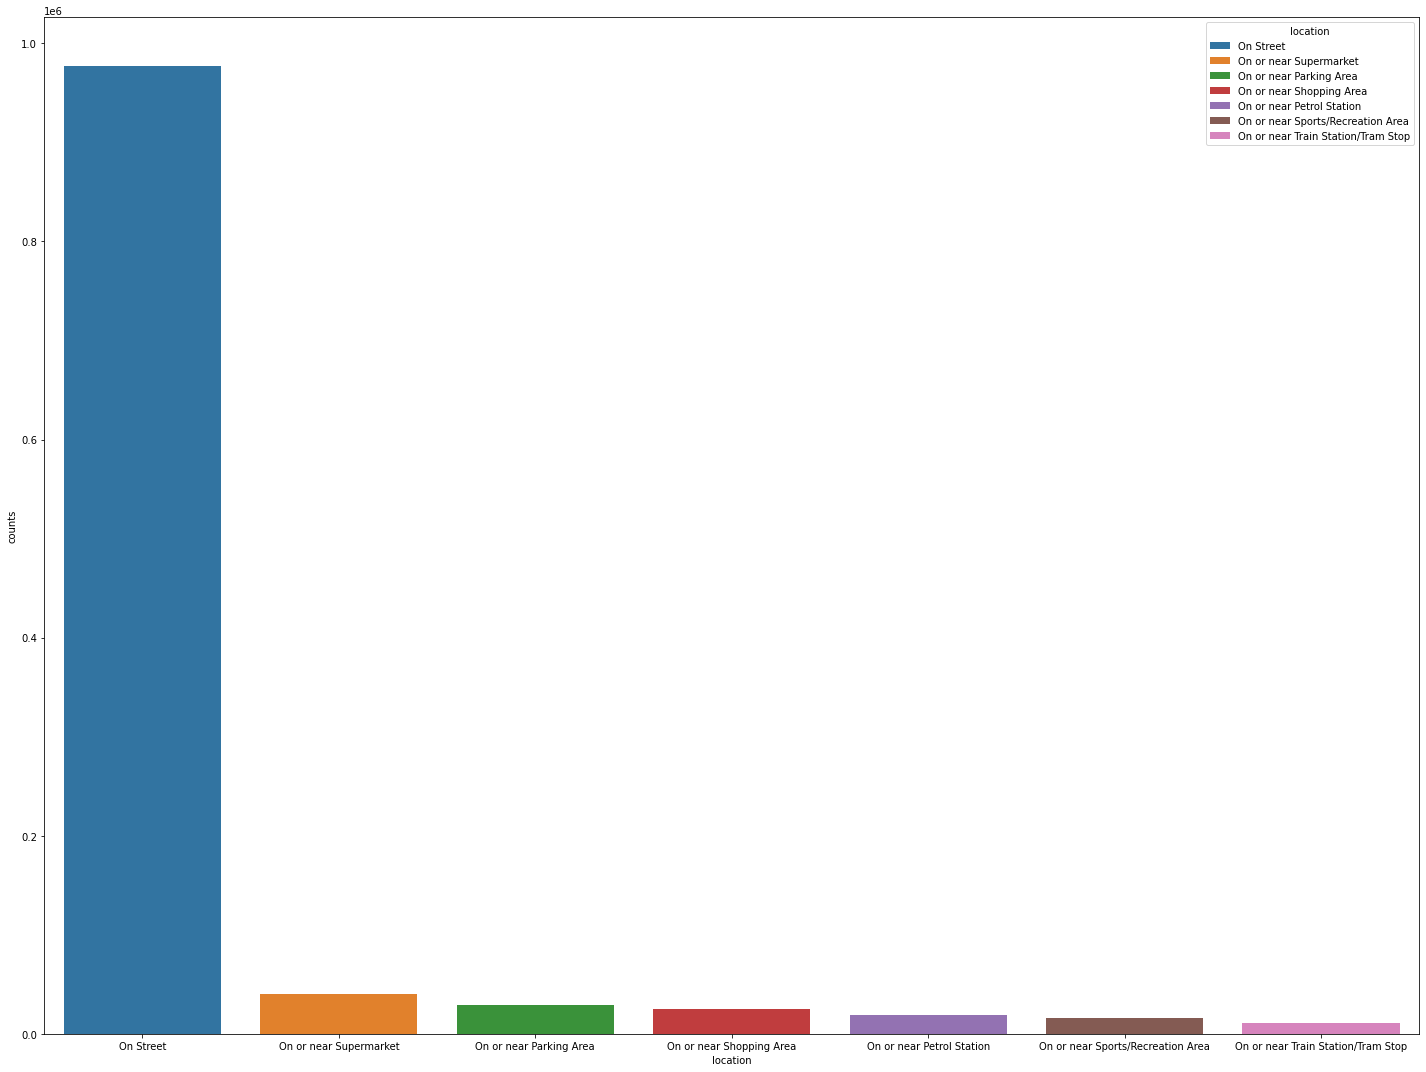

In [119]:
# Show Top 7 locations for crimes
top_seven = location_type_counts.iloc[0:7]
ax = sns.barplot(x='location', y='counts', hue='location', data=top_seven, dodge=False)

plt.show()

In [6]:
# Group dataframe by location type
loc_grp=df.groupby(['Location type'])

In [7]:
# Show percentage of crime types by location "On or near Parking Area"
loc_grp['Crime type'].value_counts(normalize=True).loc['On or near Parking Area']

Crime type
Anti-social behaviour           0.247904
Violence and sexual offences    0.184683
Other theft                     0.100673
Vehicle crime                   0.080607
Shoplifting                     0.080264
Public order                    0.057930
Theft from the person           0.053807
Drugs                           0.052364
Criminal damage and arson       0.041163
Burglary                        0.036524
Robbery                         0.026319
Bicycle theft                   0.025495
Other crime                     0.007628
Possession of weapons           0.004639
Name: Crime type, dtype: float64

In [10]:
# Create a new table grouped by season and location types
table_location = df.groupby(by=['Season','Location type']).count()

In [11]:
table_location

Crime ID   Month  \
Season Location type                                                      
Fall   On Street                                         163813  232090   
       On or near Airport/Airfield                          206     257   
       On or near Bus/Coach Station                         440     580   
       On or near Conference/Exhibition Centre              545     724   
       On or near Further/Higher Educational Building      1383    1806   
...                                                         ...     ...   
Winter On or near Sports/Recreation Area                   2051    3464   
       On or near Supermarket                              6788    8612   
       On or near Theatre/Concert Hall                      606     999   
       On or near Train Station/Tram Stop                     0    2063   
       On or near Underpass                                1306    2013   

                                                       Reported by  \
Season Location type                                                 
Fall   On Street                                            232090   
       On or near Airport/Airfield                             257   
       On or near Bus/Coach Station                            580   
       On or near Conference/Exhibition Centre                 724   
       On or near Further/Higher Educational Building         1806   
...                                                            ...   
Winter On or near Sports/Recreation Area                      3464   
       On or near Supermarket                                 8612   
       On or near Theatre/Concert Hall                         999   
       On or near Train Station/Tram Stop                     2063   
       On or near Underpass                                   2013   

                                                       Falls within  \
Season Location type                                                  
Fall   On Street                                             232090   
       On or near Airport/Airfield                              257   
       On or near Bus/Coach Station                             580   
       On or near Conference/Exhibition Centre                  724   
       On or near Further/Higher Educational Building          1806   
...                                                             ...   
Winter On or near Sports/Recreation Area                       3464   
       On or near Supermarket                                  8612   
       On or near Theatre/Concert Hall                          999   
       On or near Train Station/Tram Stop                      2063   
       On or near Underpass                                    2013   

                                                       Longitude  Latitude  \
Season Location type                                                         
Fall   On Street                                          232090    232090   
       On or near Airport/Airfield                           257       257   
       On or near Bus/Coach Station                          580       580   
       On or near Conference/Exhibition Centre               724       724   
       On or near Further/Higher Educational Building       1806      1806   
...                                                          ...       ...   
Winter On or near Sports/Recreation Area                    3464      3464   
       On or near Supermarket                               8612      8612   
       On or near Theatre/Concert Hall                       999       999   
       On or near Train Station/Tram Stop                   2063      2063   
       On or near Underpass                                 2013      2013   

                                                       Location  LSOA code  \
Season Location type                                                         
Fall   On Street                                         232090     23209

In [14]:
# Create a pivot table of crime locations aggregated by season.
df_pivot_location = pd.pivot_table(df, values='Reported by', index='Season', columns='Location type', aggfunc='count')

In [15]:
df_pivot_location

Location type  On Street  On or near Airport/Airfield  \
Season                                                  
Fall              232090                          257   
Spring            227968                          198   
Summer            230072                          228   
Winter            215255                          183   

Location type  On or near Bus/Coach Station  \
Season                                        
Fall                                    580   
Spring                                  487   
Summer                                  547   
Winter                                  455   

Location type  On or near Conference/Exhibition Centre  \
Season                                                   
Fall                                               724   
Spring                                             629   
Summer                                             696   
Winter                                             642   

Location type  On or near Further/Higher Educational Building  \
Season                                                          
Fall                                                     1806   
Spring                                                   1495   
Summer                                                   1600   
Winter                                                   1314   

Location type  On or near Hospital  On or near London Underground Station  \
Season                                                                      
Fall                          1555                                   1911   
Spring                        1621                                   1605   
Summer                        1597                                   1937   
Winter                        1287                                   1243   

Location type  On or near Meridian Square  On or near Nightclub  \
Season                                                            
Fall                                  631                  2990   
Spring                                338                  1723   
Summer                                561                  3128   
Winter                                221                  1356   

Location type  On or near Park/Open Space  On or near Parking Area  \
Season                                                               
Fall                                  597                     7083   
Spring                                638                     6404   
Summer                                567                     7059   
Winter                                513                     5992   

Location type  On or near Petrol Station  On or near Police Station  \
Season                                                                
Fall                                4622                       1580   
Spring                              4365                       1485   
Summer                              4478                       1572   
Winter                              3979                       1302   

Location type  On or near Shopping Area  On or near Sports/Recreation Area  \
Season                                                                       
Fall                               6194                               3785   
Spring                             5177                               3667   
Summer                             6934                               3791   
Winter                             4372                               3464   

Location type  On or near Supermarket  On or near Theatre/Concert Hall  \
Season                                                                   
Fall                             9818                             1702   
Spring                           9217                             1177   
Summer                           9567                             1764   
Winter                           8612                              999   

Locati

In [136]:
# Import Matplot library to display plots.
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20,15)

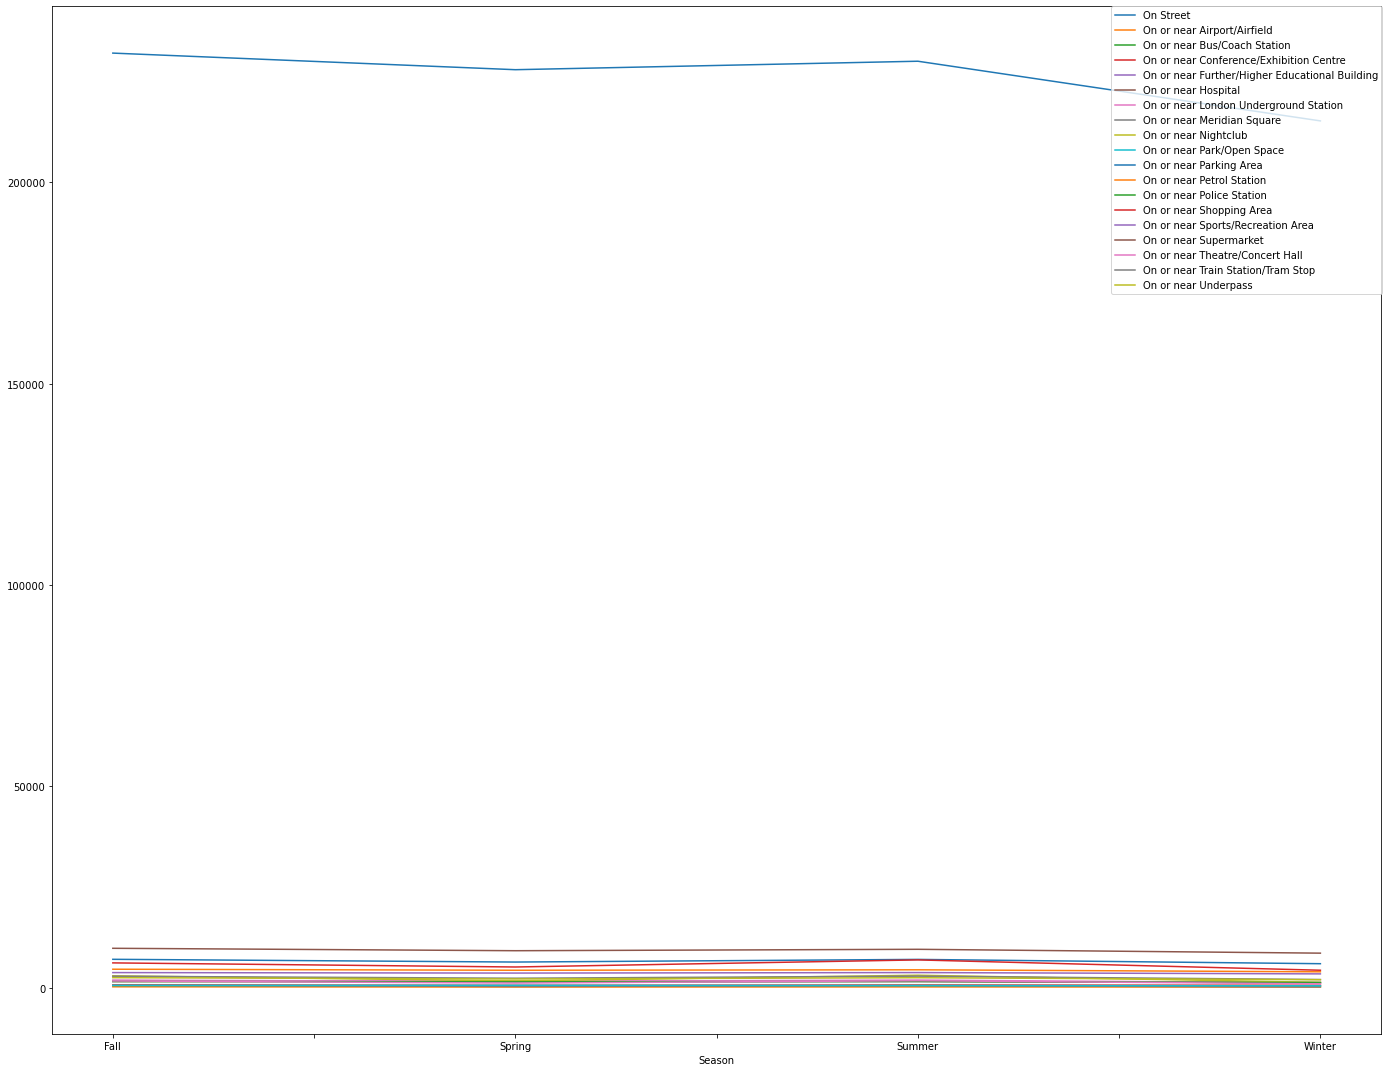

In [150]:
# Create a line chart of crimes at different locations, sorted by seasons.
df_pivot_location.plot()
plt.legend(bbox_to_anchor=(0.797, 1), loc=2, borderaxespad=0.)
plt.show()

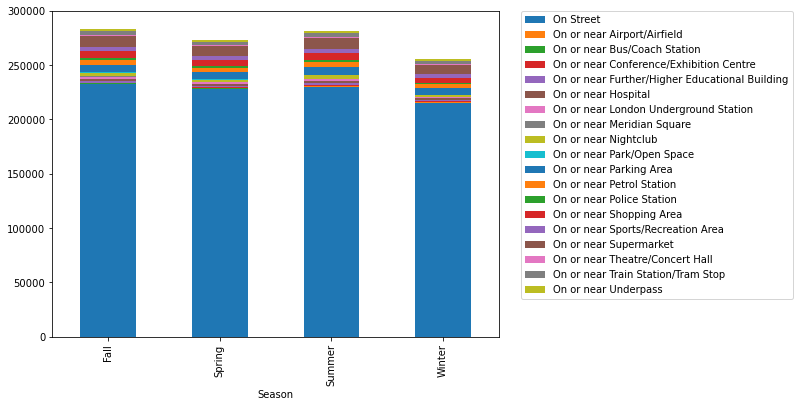

In [18]:
# Create a stacked bar chart of above location types by season.
ax = df_pivot_location.plot.bar(stacked=True, figsize=(8,6))
ax.set_ylim(0,300000)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [19]:
# Create a new dataframe that filters out location type "On Street" in order to see the distribution of the other location types better in charts.
df_filt=df.loc[~df['Location type'].str.contains('On Street')]
df_filt

Crime ID       Month  \
1                                                      NaN  2021-06-01   
6        906f1f72a297eb533d4f2ac6976c15e64b1da9ea060931...  2021-06-01   
13       a592011f36c6d21fb970399e2f7d9ca4289dad50f2e272...  2021-06-01   
20       6db34fbbaef2bc046d9c42c2d9386b179d571d37a4ece4...  2021-06-01   
49       0a78162a59523bcfc3ba1c60ee27c3517cb4be770ec934...  2021-06-01   
...                                                    ...         ...   
1182889                                                NaN  2021-08-01   
1182890                                                NaN  2021-08-01   
1182891                                                NaN  2021-08-01   
1182892                                                NaN  2021-08-01   
1182893                                                NaN  2021-08-01   

                         Reported by                 Falls within  Longitude  \
1        Metropolitan Police Service  Metropolitan Police Service   0.137065   
6        Metropolitan Police Service  Metropolitan Police Service   0.148434   
13       Metropolitan Police Service  Metropolitan Police Service   0.148434   
20       Metropolitan Police Service  Metropolitan Police Service   0.148434   
49       Metropolitan Police Service  Metropolitan Police Service   0.135071   
...                              ...                          ...        ...   
1182889     British Transport Police     British Transport Police  -0.133463   
1182890     British Transport Police     British Transport Police  -0.505346   
1182891     British Transport Police     British Transport Police  -0.505346   
1182892     British Transport Police     British Transport Police  -0.505346   
1182893     British Transport Police     British Transport Police  -0.505346   

          Latitude                           Location  LSOA code  \
1        51.583672          On or near Police Station  E01000027   
6        51.595164         On or near Park/Open Space  E01000027   
13       51.595164         On or near Park/Open Space  E01000027   
20       51.595164         On or near Park/Open Space  E01000027   
49       51.581154       On or near Pedestrian Subway  E01000029   
...            ...                                ...        ...   
1182889  51.489300    On or near Pimlico (Lu Station)  E01004741   
1182890  51.339500  On or near West Byfleet (Station)  E01031004   
1182891  51.339500  On or near West Byfleet (Station)  E01031004   
1182892  51.339500  On or near West Byfleet (Station)  E01031004   
1182893  51.339500  On or near West Byfleet (Station)  E01031004   

                         LSOA name                    Crime type  \
1        Barking and Dagenham 001A         Anti-social behaviour   
6        Barking and Dagenham 001A     Criminal damage and arson   
13       Barking and Dagenham 001A                  Public order   
20       Barking and Dagenham 001A  Violence and sexual offences   
49       Barking and Dagenham 001C     Criminal damage and arson   
...                            ...                           ...   
1182889           Westminster 024F  Violence and sexual offences   
1182890                Woking 002E                 Bicycle theft   
1182891                Woking 002E                 Bicycle theft   
1182892                Woking 002E     Criminal damage and arson   
1182893                Woking 002E                   Other theft   

                                 Last outcome category  Context  \
1                                                  NaN      NaN   
6        Investigation complete; no suspect identified      NaN   
13       Investigation complete; no suspect identified      NaN   
20                           Status update unavailable      NaN   
49       Investigation complete; no suspect identified      NaN   
...                                                ...      ...   
1182889                                            NaN      NaN   
1182890                       

In [20]:
# Create a new pivot table of crime locations aggregated by season with the filtered dataframe
df_pivot_location_filt = pd.pivot_table(df_filt, values='Reported by', index='Season', columns='Location type', aggfunc='count')
df_pivot_location_filt

Location type  On or near Airport/Airfield  On or near Bus/Coach Station  \
Season                                                                     
Fall                                   257                           580   
Spring                                 198                           487   
Summer                                 228                           547   
Winter                                 183                           455   

Location type  On or near Conference/Exhibition Centre  \
Season                                                   
Fall                                               724   
Spring                                             629   
Summer                                             696   
Winter                                             642   

Location type  On or near Further/Higher Educational Building  \
Season                                                          
Fall                                                     1806   
Spring                                                   1495   
Summer                                                   1600   
Winter                                                   1314   

Location type  On or near Hospital  On or near London Underground Station  \
Season                                                                      
Fall                          1555                                   1911   
Spring                        1621                                   1605   
Summer                        1597                                   1937   
Winter                        1287                                   1243   

Location type  On or near Meridian Square  On or near Nightclub  \
Season                                                            
Fall                                  631                  2990   
Spring                                338                  1723   
Summer                                561                  3128   
Winter                                221                  1356   

Location type  On or near Park/Open Space  On or near Parking Area  \
Season                                                               
Fall                                  597                     7083   
Spring                                638                     6404   
Summer                                567                     7059   
Winter                                513                     5992   

Location type  On or near Petrol Station  On or near Police Station  \
Season                                                                
Fall                                4622                       1580   
Spring                              4365                       1485   
Summer                              4478                       1572   
Winter                              3979                       1302   

Location type  On or near Shopping Area  On or near Sports/Recreation Area  \
Season                                                                       
Fall                               6194                               3785   
Spring                             5177                               3667   
Summer                             6934                               3791   
Winter                             4372                               3464   

Location type  On or near Supermarket  On or near Theatre/Concert Hall  \
Season                                                                   
Fall                             9818                             1702   
Spring                           9217                             1177   
Summer                           9567                             1764   
Winter                           8612                              999   

Location type  On or near Train Station/Tram Stop  On or near Underpass  
Season                                                                   
Fall                       

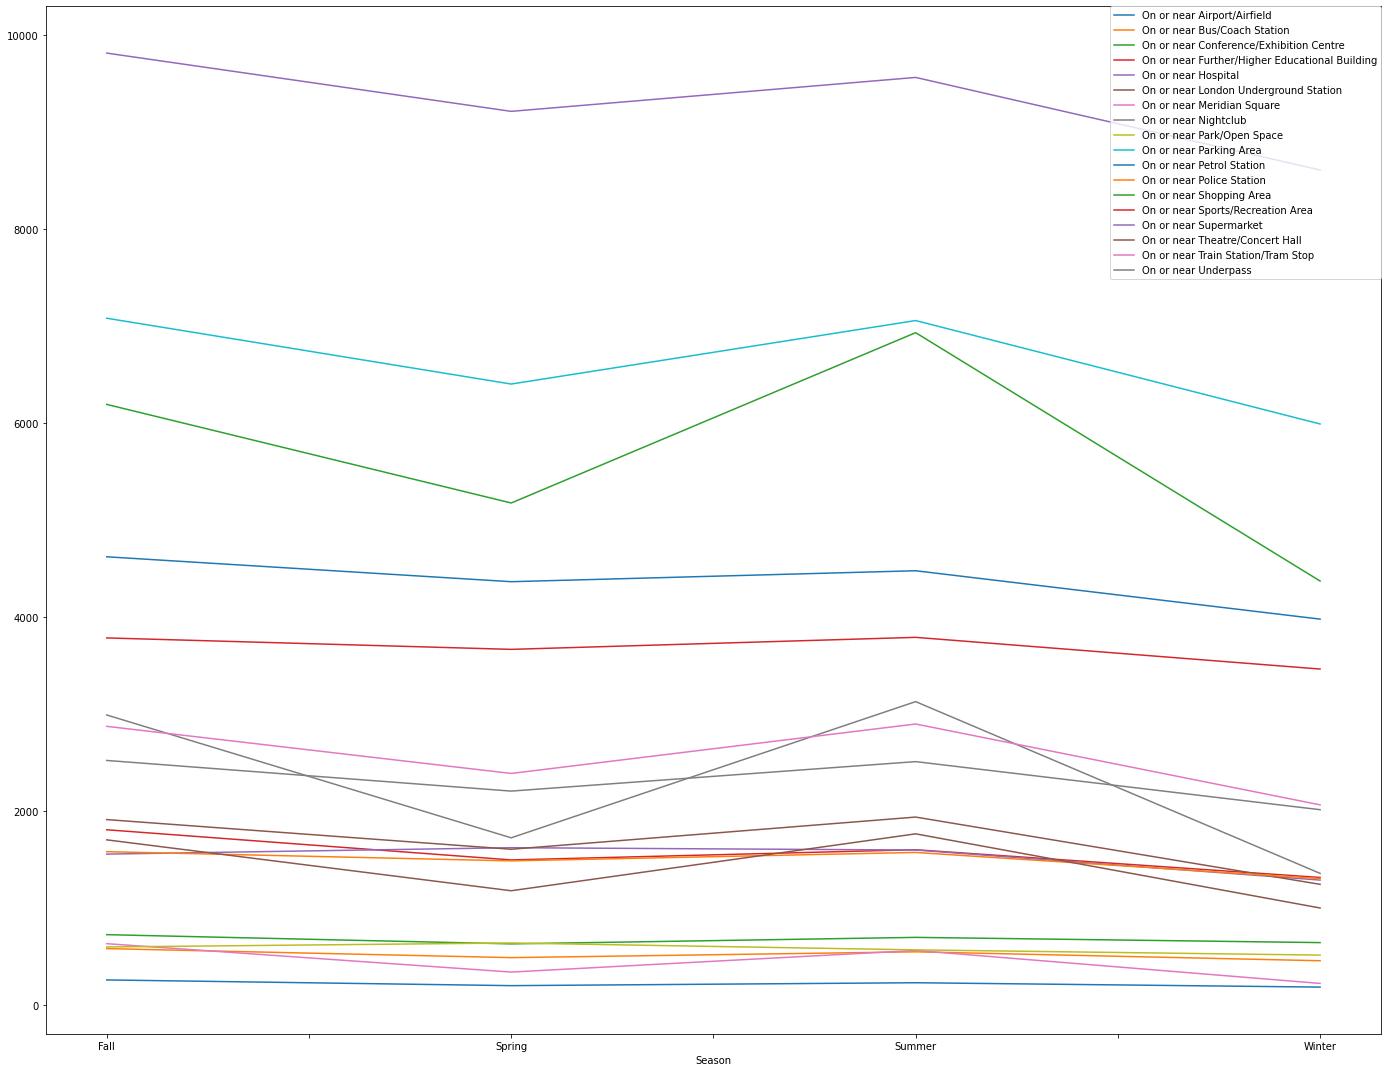

In [149]:
# Create another line chart of crimes at different locations, sorted by seasons. This time "On Street" is filtered out to better analyze the other location types.
df_pivot_location_filt.plot()
plt.legend(bbox_to_anchor=(0.797, 1), loc=2, borderaxespad=0.)
plt.show()

In [122]:
# Create a pivot table of crime count by crime and location type
df_pivot_crime_loc = pd.pivot_table(df, values='Reported by', index='Location type', columns='Crime type', aggfunc='count')
df_pivot_crime_loc

Crime type                                      Anti-social behaviour  \
Location type                                                           
On Street                                                    310104.0   
On or near Airport/Airfield                                     294.0   
On or near Bus/Coach Station                                    596.0   
On or near Conference/Exhibition Centre                         768.0   
On or near Further/Higher Educational Building                 1716.0   
On or near Hospital                                             878.0   
On or near London Underground Station                             NaN   
On or near Meridian Square                                      117.0   
On or near Nightclub                                           1592.0   
On or near Park/Open Space                                      763.0   
On or near Parking Area                                        7215.0   
On or near Petrol Station                                      3565.0   
On or near Police Station                                      1521.0   
On or near Shopping Area                                       3352.0   
On or near Sports/Recreation Area                              5032.0   
On or near Supermarket                                         7065.0   
On or near Theatre/Concert Hall                                1627.0   
On or near Train Station/Tram Stop                                NaN   
On or near Underpass                                           2678.0   

Crime type                                      Bicycle theft  Burglary  \
Location type                                                             
On Street                                             18003.0   51727.0   
On or near Airport/Airfield                               1.0       2.0   
On or near Bus/Coach Station                             74.0      67.0   
On or near Conference/Exhibition Centre                 149.0     126.0   
On or near Further/Higher Educational Building          374.0     318.0   
On or near Hospital                                     280.0     187.0   
On or near London Underground Station                   121.0      15.0   
On or near Meridian Square                               44.0      20.0   
On or near Nightclub                                    274.0     331.0   
On or near Park/Open Space                               67.0     107.0   
On or near Parking Area                                 742.0    1063.0   
On or near Petrol Station                               244.0     622.0   
On or near Police Station                                82.0     146.0   
On or near Shopping Area                                705.0     582.0   
On or near Sports/Recreation Area                       259.0     666.0   
On or near Supermarket                                 1248.0    1221.0   
On or near Theatre/Concert Hall                         254.0     231.0   
On or near Train Station/Tram Stop                      868.0      42.0   
On or near Underpass                                    241.0     342.0   

Crime type                                      Criminal damage and arson  \
Location type                                                               
On Street                                                         48652.0   
On or near Airport/Airfield                                          11.0   
On or near Bus/Coach Station                                        104.0   
On or near Conference/Exhibition Centre                             100.0   
On or near Further/Higher Educational Building                      254.0   
On or near Hospital                                                 449.0   
On or near London Underground Station                               414.0   
On or near Meridian Square                                           13.0   
On or near Nightclub                                                369.0   
On or near Park/Open Space                 

(0.0, 1000000.0)

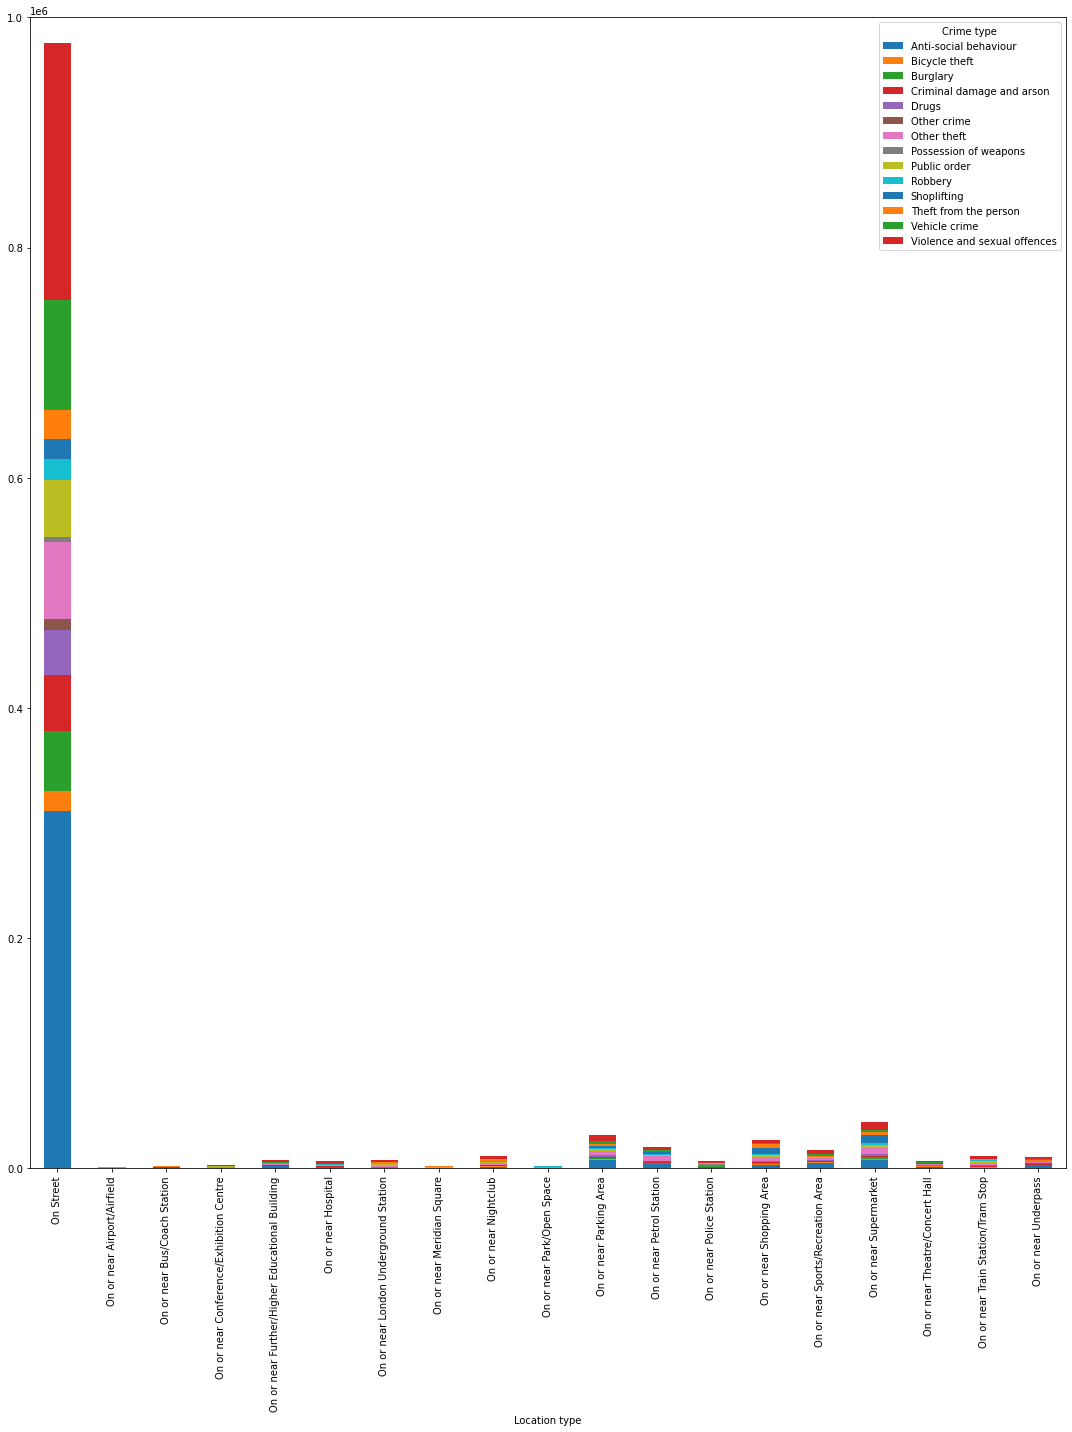

In [130]:
# Create a stacked bar chart of crime types by location type.
ax = df_pivot_crime_loc.plot.bar(stacked=True, figsize=(15,20))
ax.set_ylim(0,1000000)

In [123]:
# Create a new pivot table with the filtered dataframe (without "On Street") of crime counts by crime and location type
df_pivot_crime_loc_filt = pd.pivot_table(df_filt, values='Reported by', index='Location type', columns='Crime type', aggfunc='count')
df_pivot_crime_loc_filt

Crime type                                      Anti-social behaviour  \
Location type                                                           
On or near Airport/Airfield                                     294.0   
On or near Bus/Coach Station                                    596.0   
On or near Conference/Exhibition Centre                         768.0   
On or near Further/Higher Educational Building                 1716.0   
On or near Hospital                                             878.0   
On or near London Underground Station                             NaN   
On or near Meridian Square                                      117.0   
On or near Nightclub                                           1592.0   
On or near Park/Open Space                                      763.0   
On or near Parking Area                                        7215.0   
On or near Petrol Station                                      3565.0   
On or near Police Station                                      1521.0   
On or near Shopping Area                                       3352.0   
On or near Sports/Recreation Area                              5032.0   
On or near Supermarket                                         7065.0   
On or near Theatre/Concert Hall                                1627.0   
On or near Train Station/Tram Stop                                NaN   
On or near Underpass                                           2678.0   

Crime type                                      Bicycle theft  Burglary  \
Location type                                                             
On or near Airport/Airfield                               1.0       2.0   
On or near Bus/Coach Station                             74.0      67.0   
On or near Conference/Exhibition Centre                 149.0     126.0   
On or near Further/Higher Educational Building          374.0     318.0   
On or near Hospital                                     280.0     187.0   
On or near London Underground Station                   121.0      15.0   
On or near Meridian Square                               44.0      20.0   
On or near Nightclub                                    274.0     331.0   
On or near Park/Open Space                               67.0     107.0   
On or near Parking Area                                 742.0    1063.0   
On or near Petrol Station                               244.0     622.0   
On or near Police Station                                82.0     146.0   
On or near Shopping Area                                705.0     582.0   
On or near Sports/Recreation Area                       259.0     666.0   
On or near Supermarket                                 1248.0    1221.0   
On or near Theatre/Concert Hall                         254.0     231.0   
On or near Train Station/Tram Stop                      868.0      42.0   
On or near Underpass                                    241.0     342.0   

Crime type                                      Criminal damage and arson  \
Location type                                                               
On or near Airport/Airfield                                          11.0   
On or near Bus/Coach Station                                        104.0   
On or near Conference/Exhibition Centre                             100.0   
On or near Further/Higher Educational Building                      254.0   
On or near Hospital                                                 449.0   
On or near London Underground Station                               414.0   
On or near Meridian Square                                           13.0   
On or near Nightclub                                                369.0   
On or near Park/Open Space                                          101.0   
On or near Parking Area                                            1198.0   
On or near Petrol Station                                           837.0   
On or near Police Station            

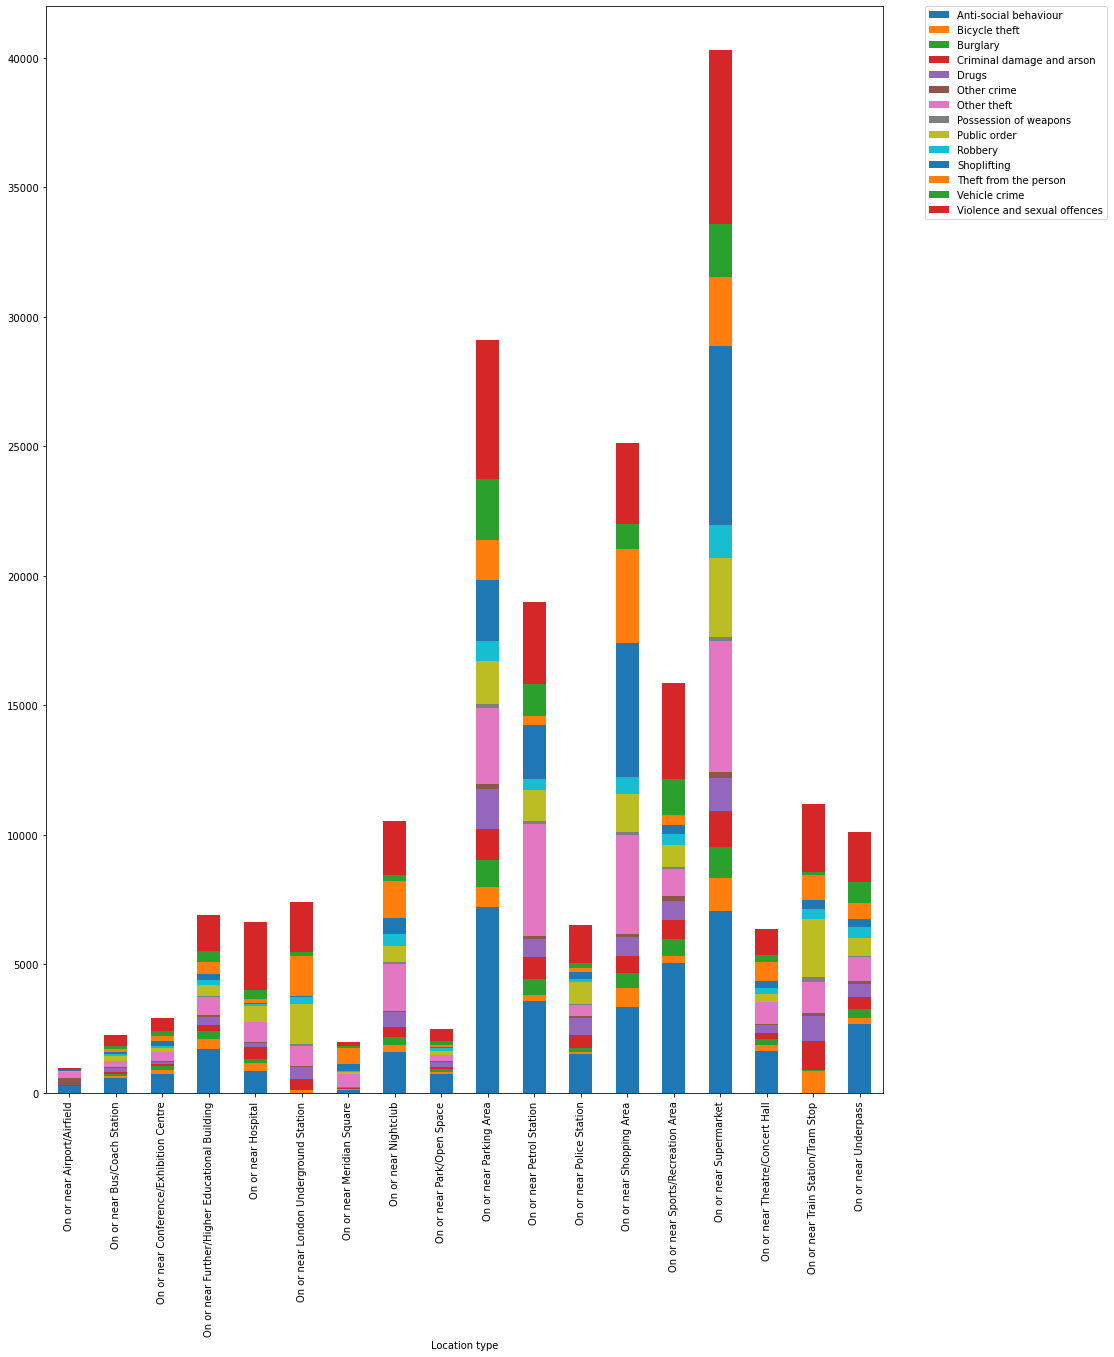

In [23]:
# Create a new stacked bar chart of crime types by location type.
ax = df_pivot_crime_loc.plot.bar(stacked=True, figsize=(15,20))
ax.set_ylim(0,42000)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
# Analysis on last outcome category

In [151]:
# Create a pivot table wich shows how crime type and last outcome category are connected
df_pivot_outcome = pd.pivot_table(df, values='Reported by', index='Crime type', columns='Last outcome category', aggfunc='count')
df_pivot_outcome

Last outcome category         Action to be taken by another organisation  \
Crime type                                                                 
Bicycle theft                                                        NaN   
Burglary                                                             NaN   
Criminal damage and arson                                            NaN   
Drugs                                                                NaN   
Other crime                                                          5.0   
Other theft                                                          2.0   
Possession of weapons                                                NaN   
Public order                                                         2.0   
Robbery                                                              NaN   
Shoplifting                                                          NaN   
Theft from the person                                                NaN   
Vehicle crime                                                        NaN   
Violence and sexual offences                                        10.0   

Last outcome category         Awaiting court outcome  \
Crime type                                             
Bicycle theft                                  115.0   
Burglary                                      1189.0   
Criminal damage and arson                     1256.0   
Drugs                                         4378.0   
Other crime                                    559.0   
Other theft                                    273.0   
Possession of weapons                         1166.0   
Public order                                  1934.0   
Robbery                                        764.0   
Shoplifting                                   1327.0   
Theft from the person                          199.0   
Vehicle crime                                  499.0   
Violence and sexual offences                  5718.0   

Last outcome category         Court result unavailable  \
Crime type                                               
Bicycle theft                                     60.0   
Burglary                                         698.0   
Criminal damage and arson                        969.0   
Drugs                                           3585.0   
Other crime                                      444.0   
Other theft                                      175.0   
Possession of weapons                            956.0   
Public order                                    1235.0   
Robbery                                          387.0   
Shoplifting                                      934.0   
Theft from the person                             88.0   
Vehicle crime                                    376.0   
Violence and sexual offences                    3418.0   

Last outcome category         Formal action is not in the public interest  \
Crime type                                                                  
Bicycle theft                                                         1.0   
Burglary                                                              1.0   
Criminal damage and arson                                             4.0   
Drugs                                                                42.0   
Other crime                                                           8.0   
Other theft                                                           4.0   
Possession of weapons                                                 5.0   
Public order                                                         22.0   
Robbery                                                               NaN   
Shoplifting                                                          15.0   
Theft from the person                                                 2.0   
Vehicle crime                                                         1.0   
Violence and sexual offences                                         

(0.0, 270000.0)

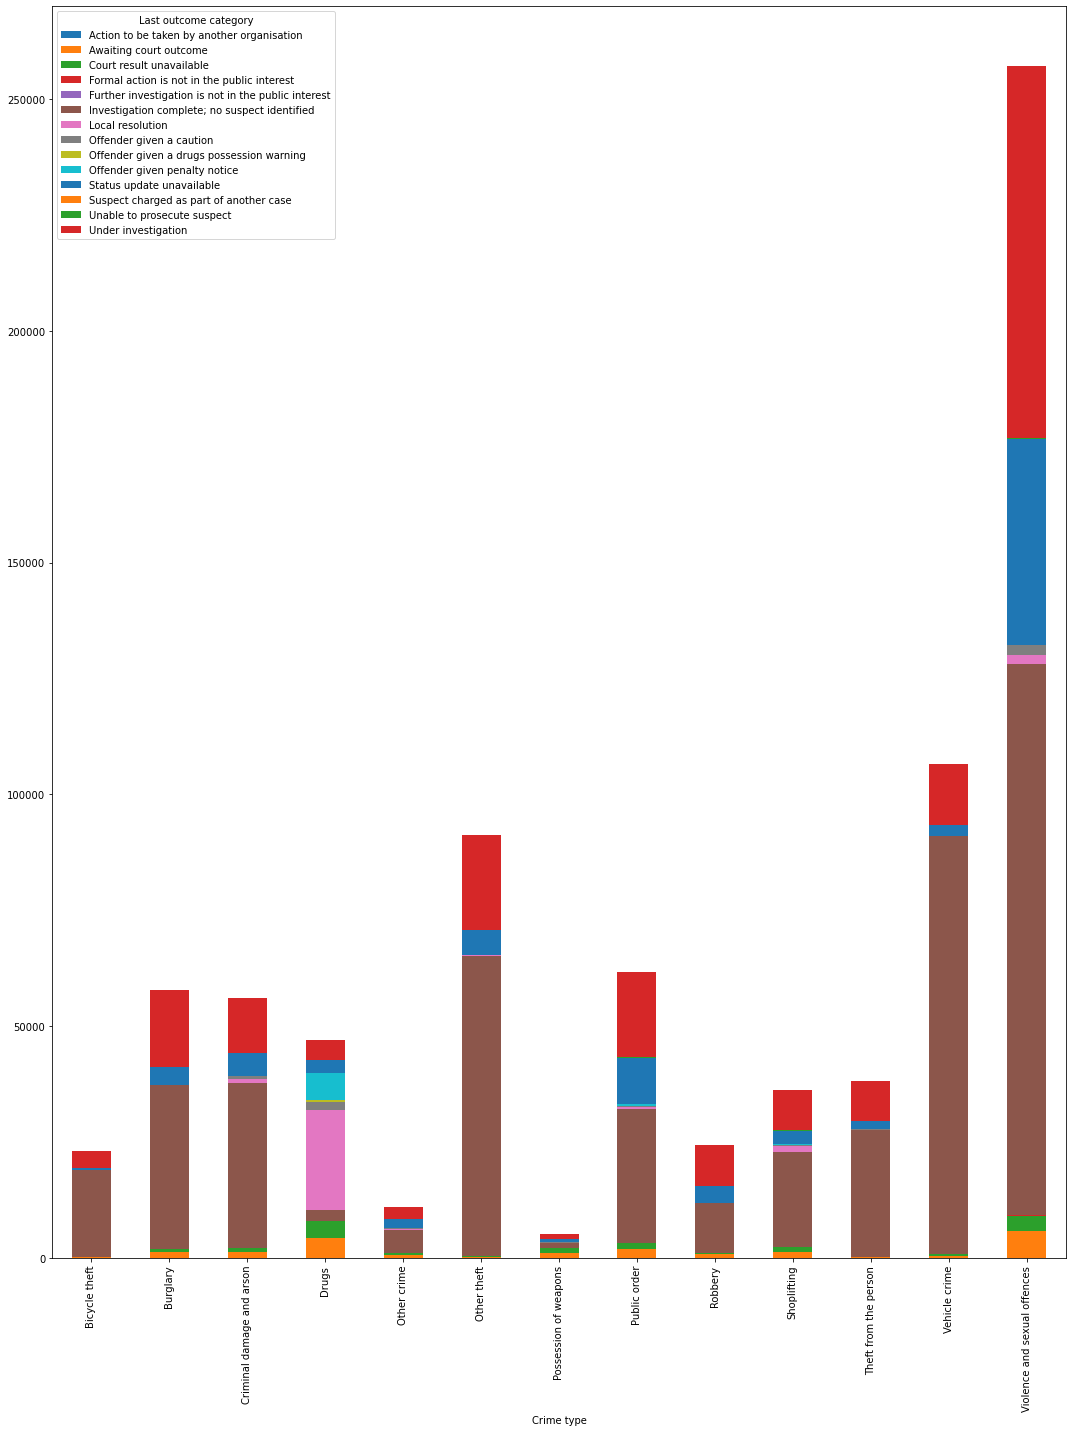

In [154]:
# Create a stacked bar chart of the above last outcome category sorted by crime type.
ax = df_pivot_outcome.plot.bar(stacked=True, figsize=(15,20))
ax.set_ylim(0,270000)

In [155]:
# Create a table where data is grouped by crime types and the last outcome category
table = df.groupby(by=['Crime type','Last outcome category']).count()
table

Crime ID  \
Crime type                   Last outcome category                                     
Bicycle theft                Awaiting court outcome                              115   
                             Court result unavailable                             60   
                             Formal action is not in the public interest           1   
                             Investigation complete; no suspect identified     18797   
                             Local resolution                                     31   
...                                                                              ...   
Violence and sexual offences Offender given a drugs possession warning             1   
                             Offender given penalty notice                        27   
                             Status update unavailable                         44352   
                             Unable to prosecute suspect                         231   
                             Under investigation                               80229   

                                                                            Month  \
Crime type                   Last outcome category                                  
Bicycle theft                Awaiting court outcome                           115   
                             Court result unavailable                          60   
                             Formal action is not in the public interest        1   
                             Investigation complete; no suspect identified  18797   
                             Local resolution                                  31   
...                                                                           ...   
Violence and sexual offences Offender given a drugs possession warning          1   
                             Offender given penalty notice                     27   
                             Status update unavailable                      44352   
                             Unable to prosecute suspect                      231   
                             Under investigation                            80229   

                                                                            Reported by  \
Crime type                   Last outcome category                                        
Bicycle theft                Awaiting court outcome                                 115   
                             Court result unavailable                                60   
                             Formal action is not in the public interest              1   
                             Investigation complete; no suspect identified        18797   
                             Local resolution                                        31   
...                                                                                 ...   
Violence and sexual offences Offender given a drugs possession warning                1   
                             Offender given penalty notice                           27   
                             Status update unavailable                            44352   
                             Unable to prosecute suspect                            231   
                             Under investigation                                  80229   

                                                                            Falls within  \
Crime type                   Last outcome category                                         
Bicycle theft                Awaiting court outcome                                  115   
                             Court result unavailable                                 60   
                             Formal action is not in the public interest               1   
                             Investigation complete; no suspect identified         18797   
                             Local resolution                                         31 

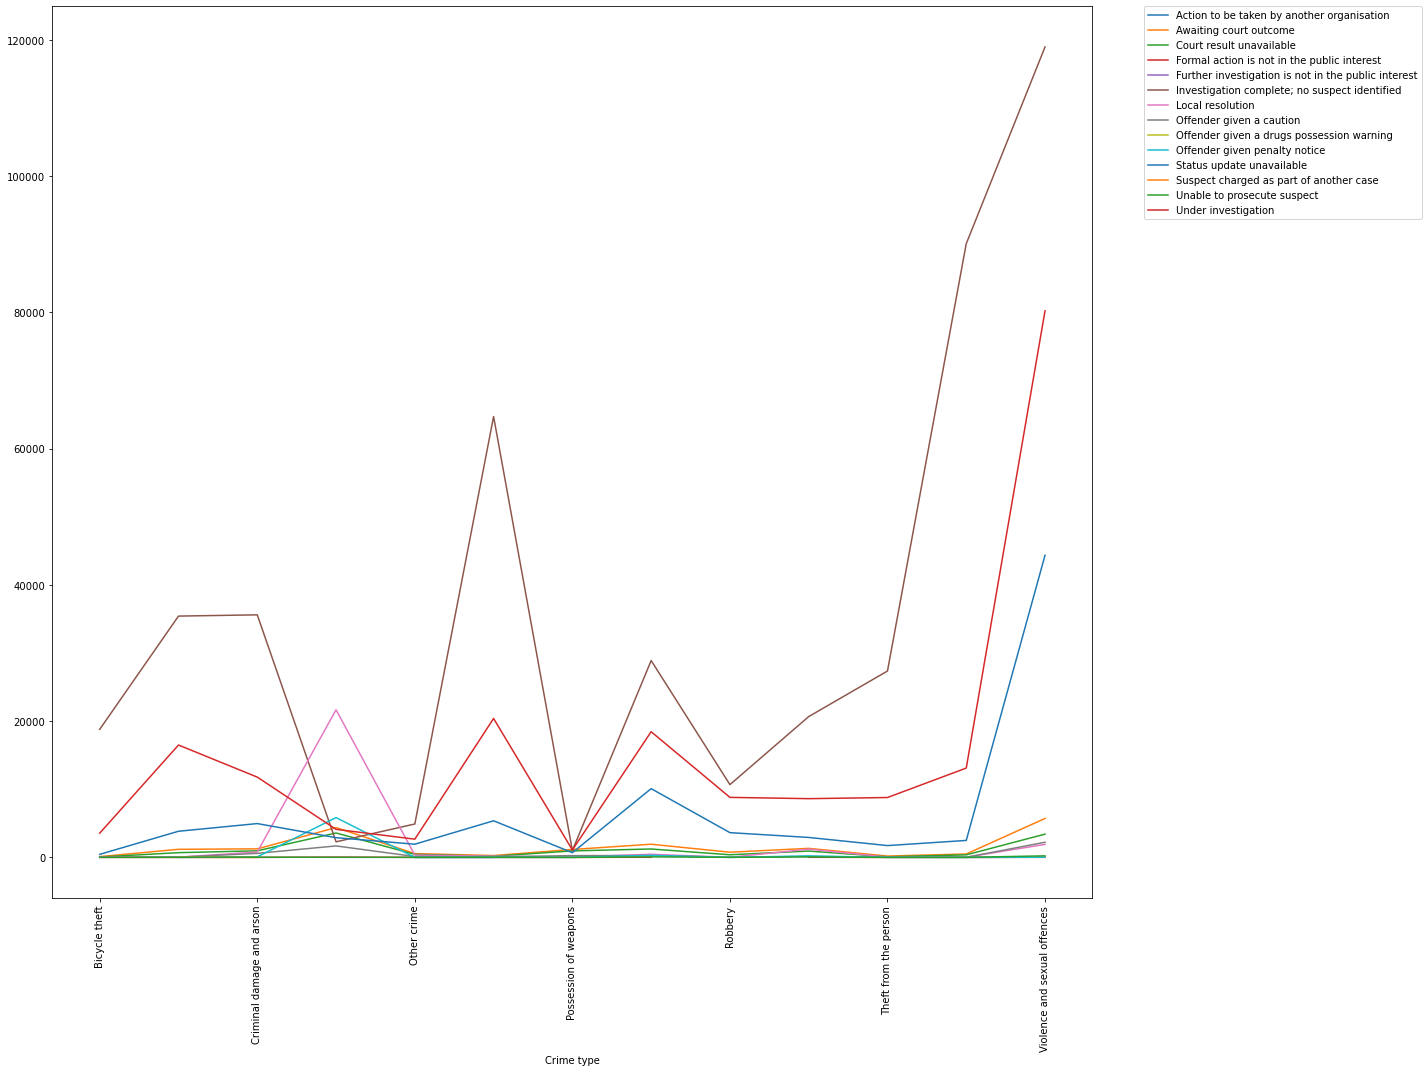

In [156]:
# Create a line chart showing last outcome category by crime type.
df_pivot_outcome.plot()
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [157]:
# Show for which crime type the outcome was "Formal action is not in the public interest"?
df_pivot_outcome['Formal action is not in the public interest']

Crime type
Bicycle theft                    1.0
Burglary                         1.0
Criminal damage and arson        4.0
Drugs                           42.0
Other crime                      8.0
Other theft                      4.0
Possession of weapons            5.0
Public order                    22.0
Robbery                          NaN
Shoplifting                     15.0
Theft from the person            2.0
Vehicle crime                    1.0
Violence and sexual offences    14.0
Name: Formal action is not in the public interest, dtype: float64

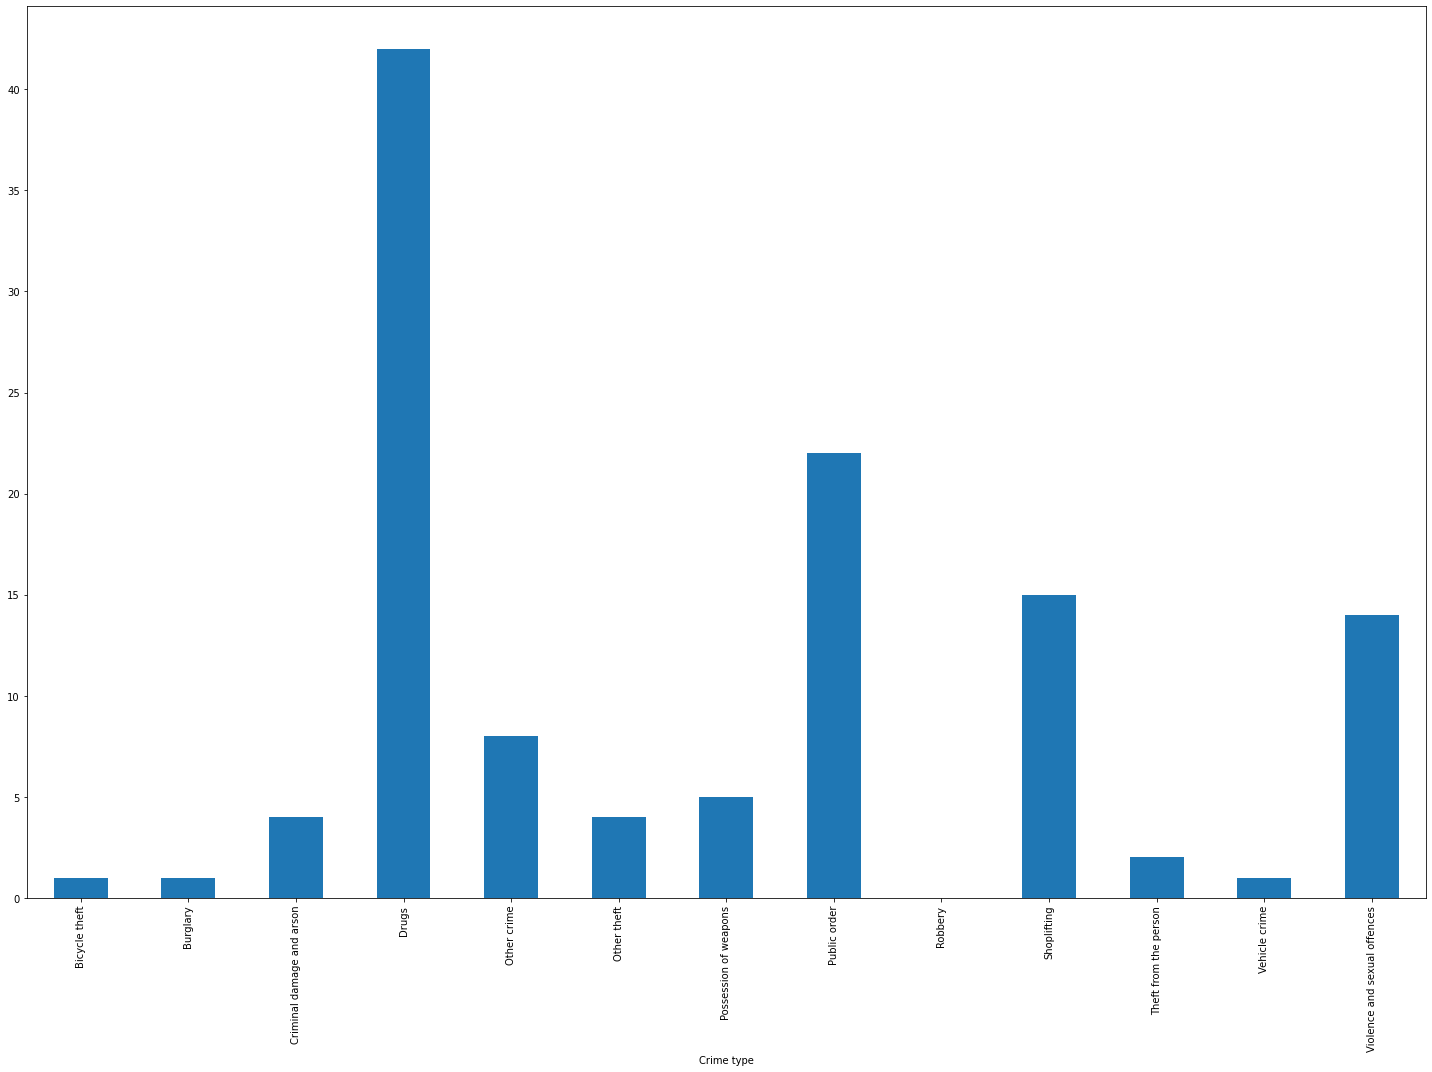

In [158]:
# Show the counts of crimes with outcome "Formal action is not in the public interest".
df_pivot_outcome['Formal action is not in the public interest'].plot(kind="bar")
plt.xticks(rotation=90)
plt.show()

In [36]:
# Create a pivot table which shows how location type and last outcome category are connected
df_pivot1 = pd.pivot_table(df, values='Reported by', index='Location type', columns='Last outcome category', aggfunc='count')
df_pivot1

Last outcome category                           Action to be taken by another organisation  \
Location type                                                                                
On Street                                                                             19.0   
On or near Airport/Airfield                                                            NaN   
On or near Bus/Coach Station                                                           NaN   
On or near Conference/Exhibition Centre                                                NaN   
On or near Further/Higher Educational Building                                         NaN   
On or near Hospital                                                                    NaN   
On or near Meridian Square                                                             NaN   
On or near Nightclub                                                                   NaN   
On or near Park/Open Space                                                             NaN   
On or near Parking Area                                                                NaN   
On or near Petrol Station                                                              NaN   
On or near Police Station                                                              NaN   
On or near Shopping Area                                                               NaN   
On or near Sports/Recreation Area                                                      NaN   
On or near Supermarket                                                                 NaN   
On or near Theatre/Concert Hall                                                        NaN   
On or near Underpass                                                                   NaN   

Last outcome category                           Awaiting court outcome  \
Location type                                                            
On Street                                                      15288.0   
On or near Airport/Airfield                                       47.0   
On or near Bus/Coach Station                                      61.0   
On or near Conference/Exhibition Centre                           44.0   
On or near Further/Higher Educational Building                   106.0   
On or near Hospital                                              146.0   
On or near Meridian Square                                        62.0   
On or near Nightclub                                             242.0   
On or near Park/Open Space                                        35.0   
On or near Parking Area                                          528.0   
On or near Petrol Station                                        379.0   
On or near Police Station                                        488.0   
On or near Shopping Area                                         610.0   
On or near Sports/Recreation Area                                220.0   
On or near Supermarket                                           817.0   
On or near Theatre/Concert Hall                                  142.0   
On or near Underpass                                             162.0   

Last outcome category                           Court result unavailable  \
Location type                                                              
On Street                                                        10625.0   
On or near Airport/Airfield                                         31.0   
On or near Bus/Coach Station                                        29.0   
On or near Conference/Exhibition Centre                             38.0   
On or near Further/Higher Educational Building                      85.0   
On or near Hospital                                                 81.0   
On or near Meridian Square                                          15.0   
On or near Nightclub                                                85.0   
On or near Park/Open Space                    

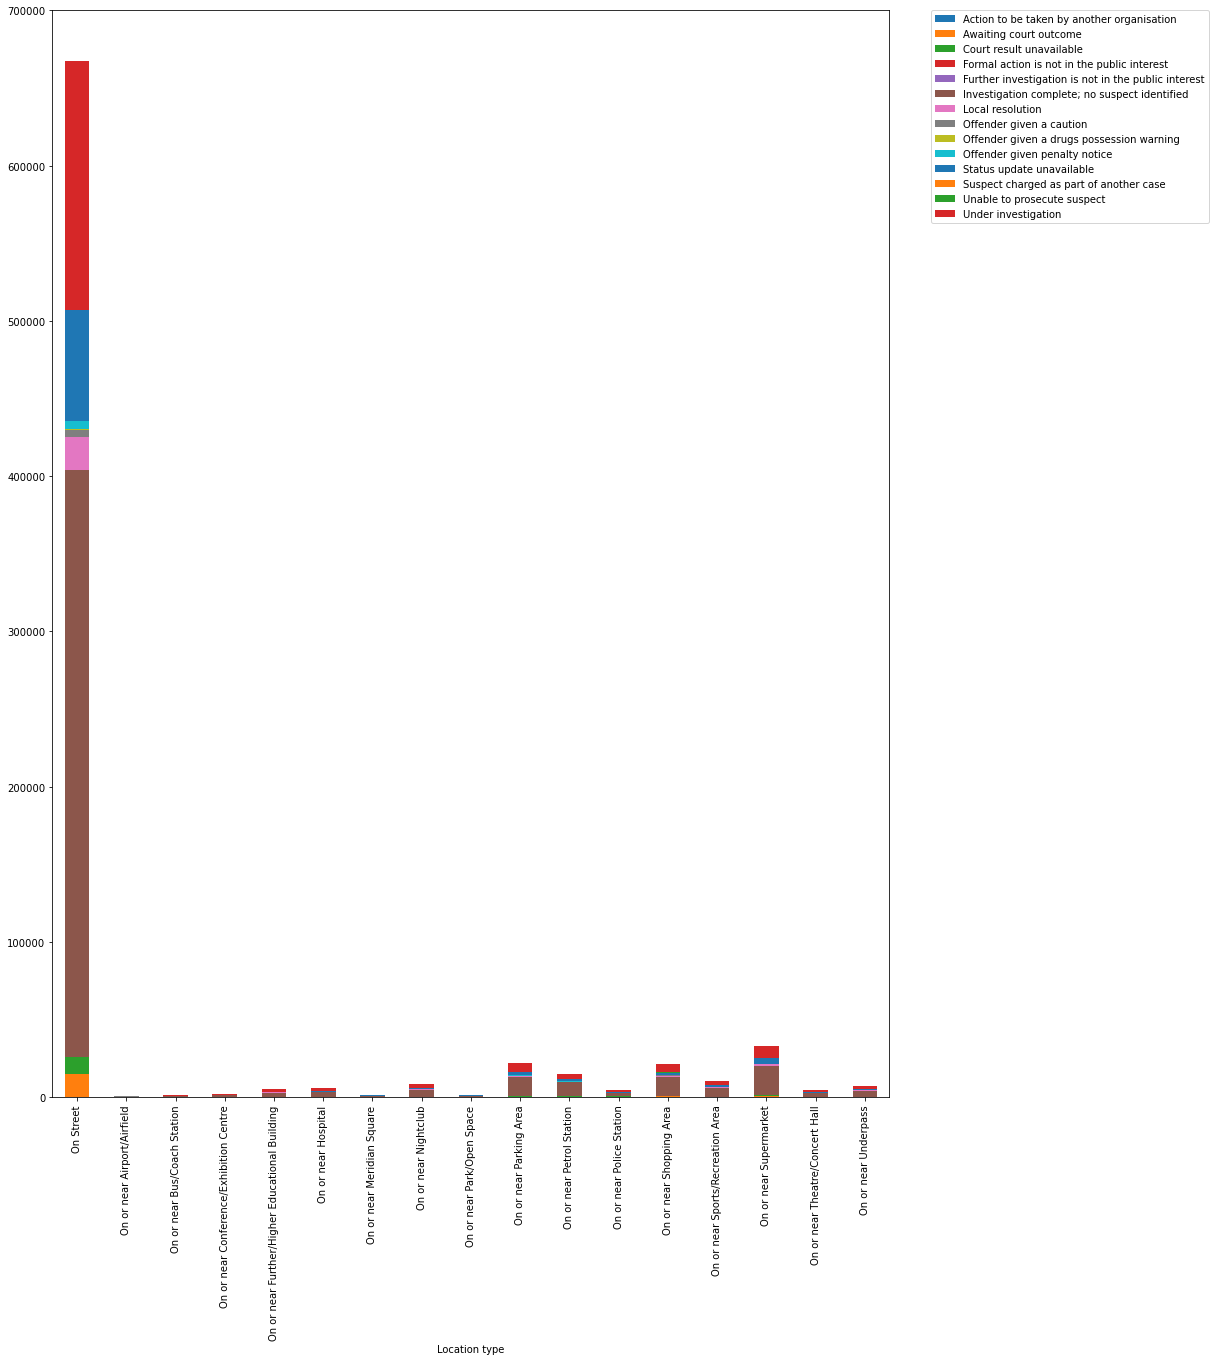

In [41]:
# Create a stacked bar chart of the above last outcome category sorted by location type.
ax = df_pivot1.plot.bar(stacked=True, figsize=(15,20))
ax.set_ylim(0,700000)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [178]:
# Which location type has 'Investigation complete, no suspect identified' as outcome?
df_pivot1['Investigation complete; no suspect identified']

Location type
On Street                                         388786.0
On or near Airport/Airfield                          394.0
On or near Bus/Coach Station                         849.0
On or near Conference/Exhibition Centre             1331.0
On or near Further/Higher Educational Building      2900.0
On or near Hospital                                 3225.0
On or near Meridian Square                           942.0
On or near Nightclub                                4965.0
On or near Park/Open Space                           957.0
On or near Parking Area                            12275.0
On or near Petrol Station                           9252.0
On or near Police Station                           1976.0
On or near Shopping Area                           12815.0
On or near Sports/Recreation Area                   5951.0
On or near Supermarket                             19411.0
On or near Theatre/Concert Hall                     2664.0
On or near Underpass                      

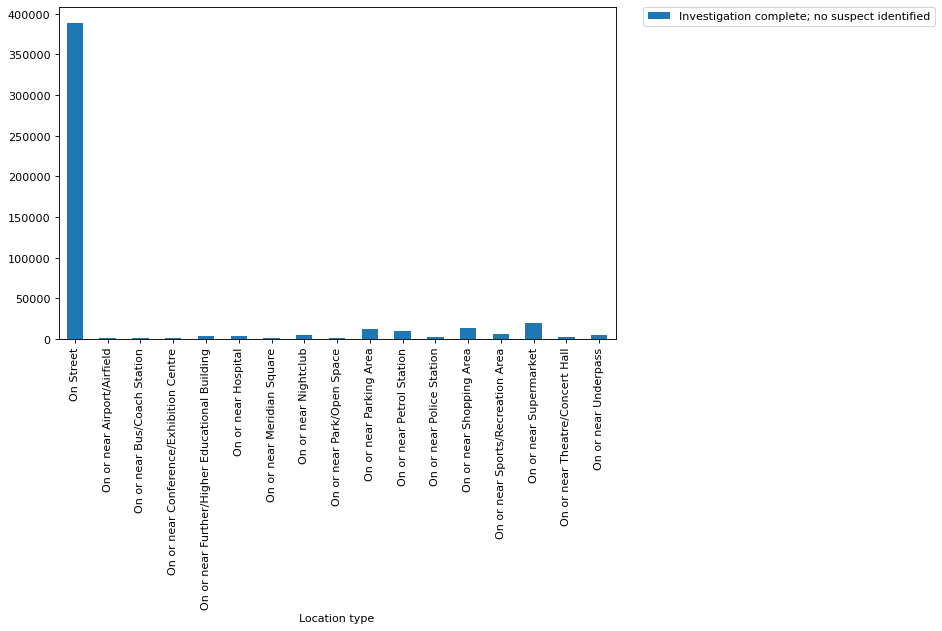

In [179]:
figure(figsize=(12, 8), dpi=80)
df_pivot1['Investigation complete; no suspect identified'].plot(kind="bar")
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [180]:
# Which crime type has 'Investigation complete, no suspect identified' as outcome?
df_pivot['Investigation complete; no suspect identified']

Crime type
Bicycle theft                    19136.0
Burglary                         37154.0
Criminal damage and arson        36333.0
Drugs                             2356.0
Other crime                       5084.0
Other theft                      66585.0
Possession of weapons             1050.0
Public order                     29701.0
Robbery                          11134.0
Shoplifting                      21233.0
Theft from the person            28473.0
Vehicle crime                    91666.0
Violence and sexual offences    123005.0
Name: Investigation complete; no suspect identified, dtype: float64

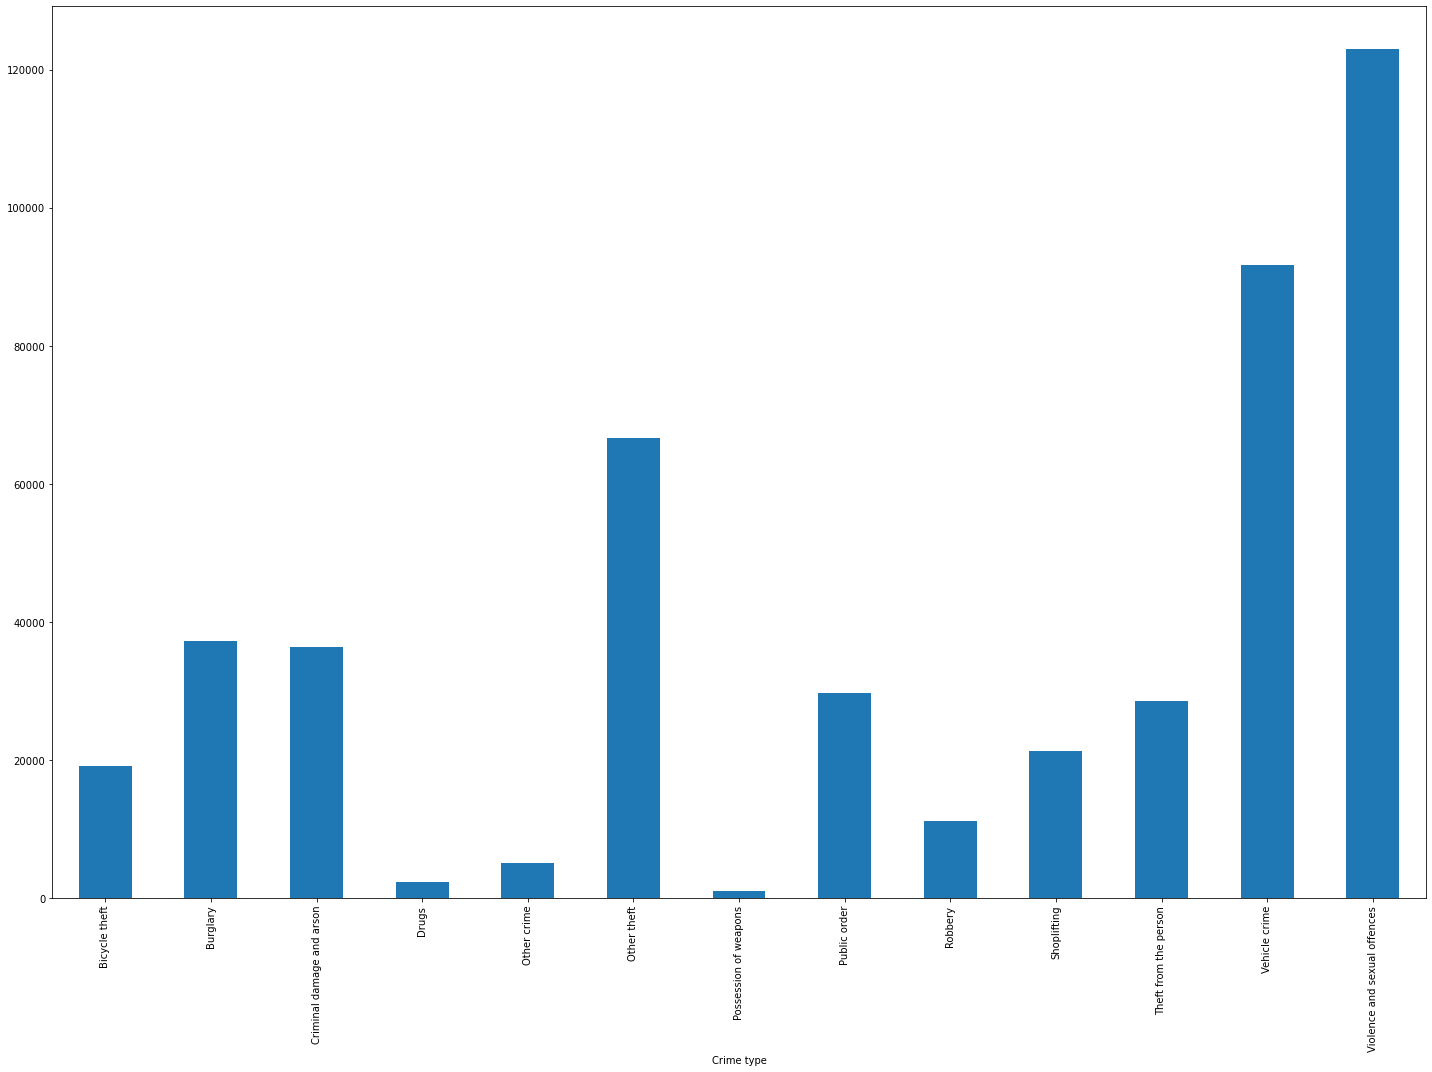

In [181]:
df_pivot['Investigation complete; no suspect identified'].plot(kind="bar")
plt.xticks(rotation=90)
plt.show()

<Figure size 10000x10000 with 0 Axes>

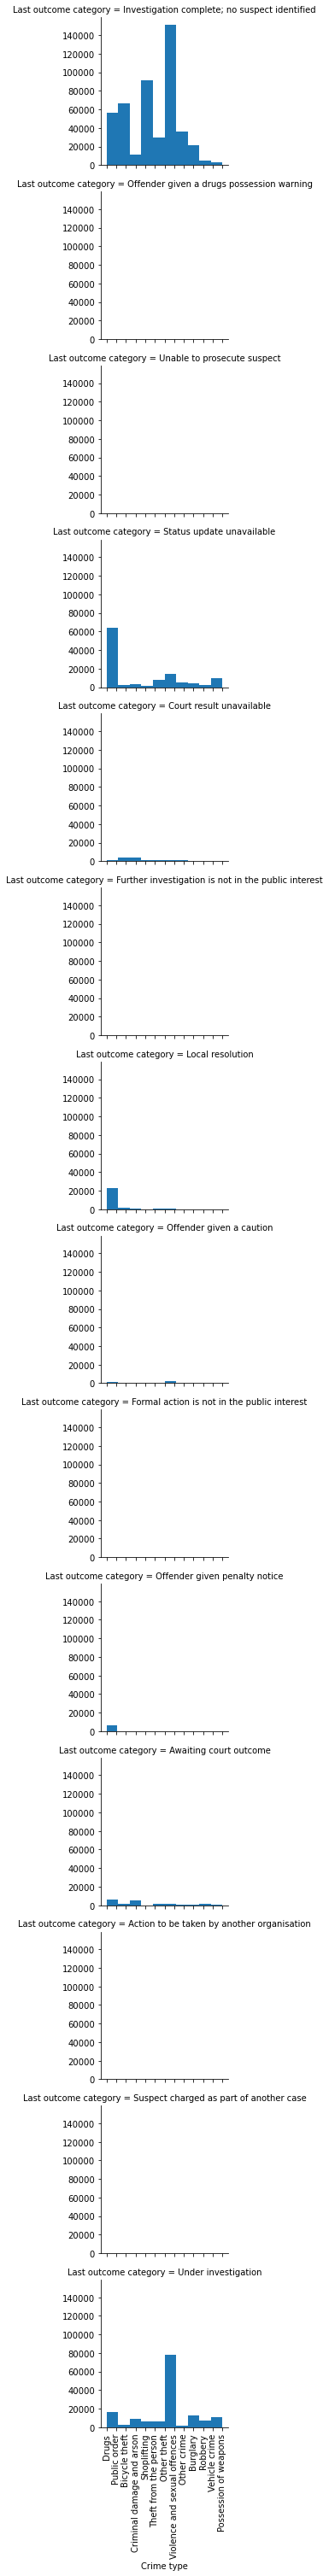

In [182]:
# Which crime type has what outcome (with which prevalence)?
from matplotlib.pyplot import figure
figure(figsize=(100, 100), dpi=100)
g = sns.FacetGrid(df, row = "Last outcome category")
g = g.map(plt.hist, "Crime type")
plt.xticks(rotation=90)
plt.show()

In [42]:
# Show the total counts for the different last outcome categories
df['Last outcome category'].value_counts()

Investigation complete; no suspect identified          459369
Under investigation                                    198135
Status update unavailable                               85393
Local resolution                                        26776
Awaiting court outcome                                  19377
Court result unavailable                                13325
Offender given penalty notice                            6493
Offender given a caution                                 5524
Unable to prosecute suspect                               490
Offender given a drugs possession warning                 397
Formal action is not in the public interest               119
Suspect charged as part of another case                    26
Action to be taken by another organisation                 19
Further investigation is not in the public interest         9
Name: Last outcome category, dtype: int64

In [43]:
# Show the percentage distribution per last outcome category
df['Last outcome category'].value_counts(normalize = True)

Investigation complete; no suspect identified          0.563331
Under investigation                                    0.242976
Status update unavailable                              0.104719
Local resolution                                       0.032836
Awaiting court outcome                                 0.023762
Court result unavailable                               0.016341
Offender given penalty notice                          0.007962
Offender given a caution                               0.006774
Unable to prosecute suspect                            0.000601
Offender given a drugs possession warning              0.000487
Formal action is not in the public interest            0.000146
Suspect charged as part of another case                0.000032
Action to be taken by another organisation             0.000023
Further investigation is not in the public interest    0.000011
Name: Last outcome category, dtype: float64

In [46]:
# Create labels for a pie chart on outcomes
outcome = ['Investigation complete; no suspect identified (56.3%)', 'Under investigation (24.3%)', 'Status update unavailable (10.5%)', 'Local resolution (3.3%)', 'Awaiting court outcome (2.4%)', 'Court result unavailable (1.6%)','Offender given penalty notice (0.8%)','Offender given a caution (0.7%)', 'Unable to prosecute suspect (0.06%)','Offender given a drugs possession warning (0.05%)', 'Formal action is not in the public interest (0.01%)', 'Suspect charged as part of another case (0.003%)', 'Action to be taken by another organisation (0.002%)', 'Further investigation is not in the public interest (0.001%)']


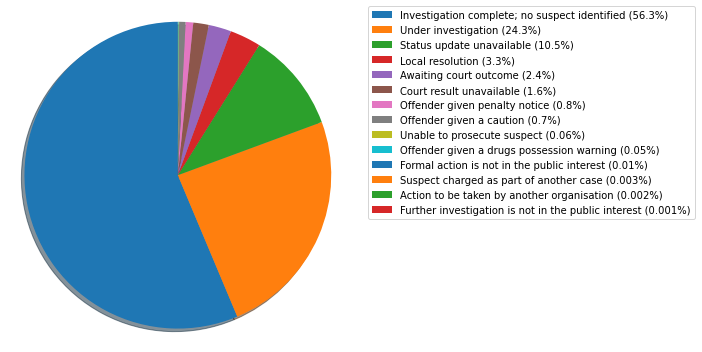

In [52]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True

labels = outcome
sizes =  df['Last outcome category'].value_counts()

patches, texts = plt.pie(sizes, shadow=True, startangle=90)
plt.legend(patches,labels,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axis('equal')

plt.show()

In [53]:
# Create a new table with the top 9 outcomes and their total counts 
Last_outcome_category = df['Last outcome category'].value_counts().rename_axis('outcome').reset_index(name='counts')
Last_outcome_category.iloc[0:9]

outcome  counts
0  Investigation complete; no suspect identified  459369
1                            Under investigation  198135
2                      Status update unavailable   85393
3                               Local resolution   26776
4                         Awaiting court outcome   19377
5                       Court result unavailable   13325
6                  Offender given penalty notice    6493
7                       Offender given a caution    5524
8                    Unable to prosecute suspect     490

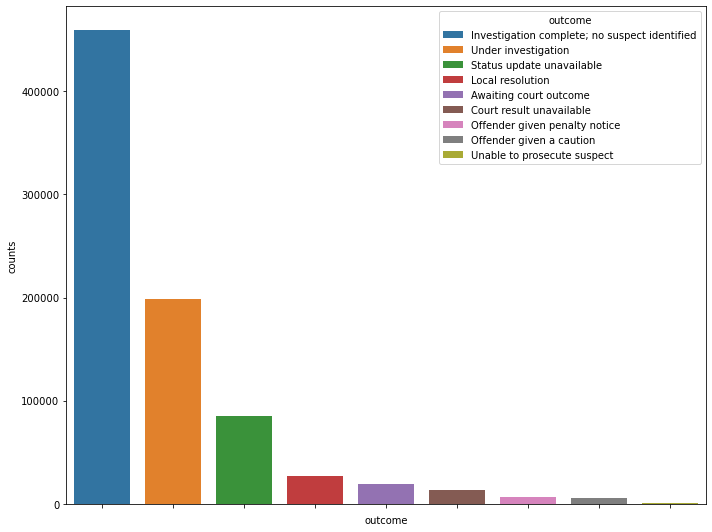

In [176]:
# Create a bar chart of the top 9 outcomes and their counts
top_nine = Last_outcome_category.iloc[0:9]
plt.figure(figsize=(10,7.5))
ax = sns.barplot(x='outcome', y='counts', hue='outcome', data=top_nine, dodge=False)
ax.set(xticklabels=[])

plt.show()

In [159]:
# Percentage of missing data by column
for col in df.columns:
    pct_missing =100* np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

Crime ID - 31.06296929395195%
Month - 0.0%
Reported by - 0.0%
Falls within - 0.0%
Longitude - 0.0%
Latitude - 0.0%
Location - 0.0%
LSOA code - 0.0%
LSOA name - 0.0%
Crime type - 0.0%
Last outcome category - 31.06296929395195%
Context - 100.0%
Location type - 0.0%
Season - 7.610149345588024%


In [160]:
BBox = (df.Longitude.min(),   df.Longitude.max(), df.Latitude.min(), df.Latitude.max())
BBox

(-0.513304, 0.332443, 51.2915, 51.691486)

In [162]:
map_m = plt.imread(r'/Users/theres/Downloads/Data-Science-Group-4/src/plots/map.png')

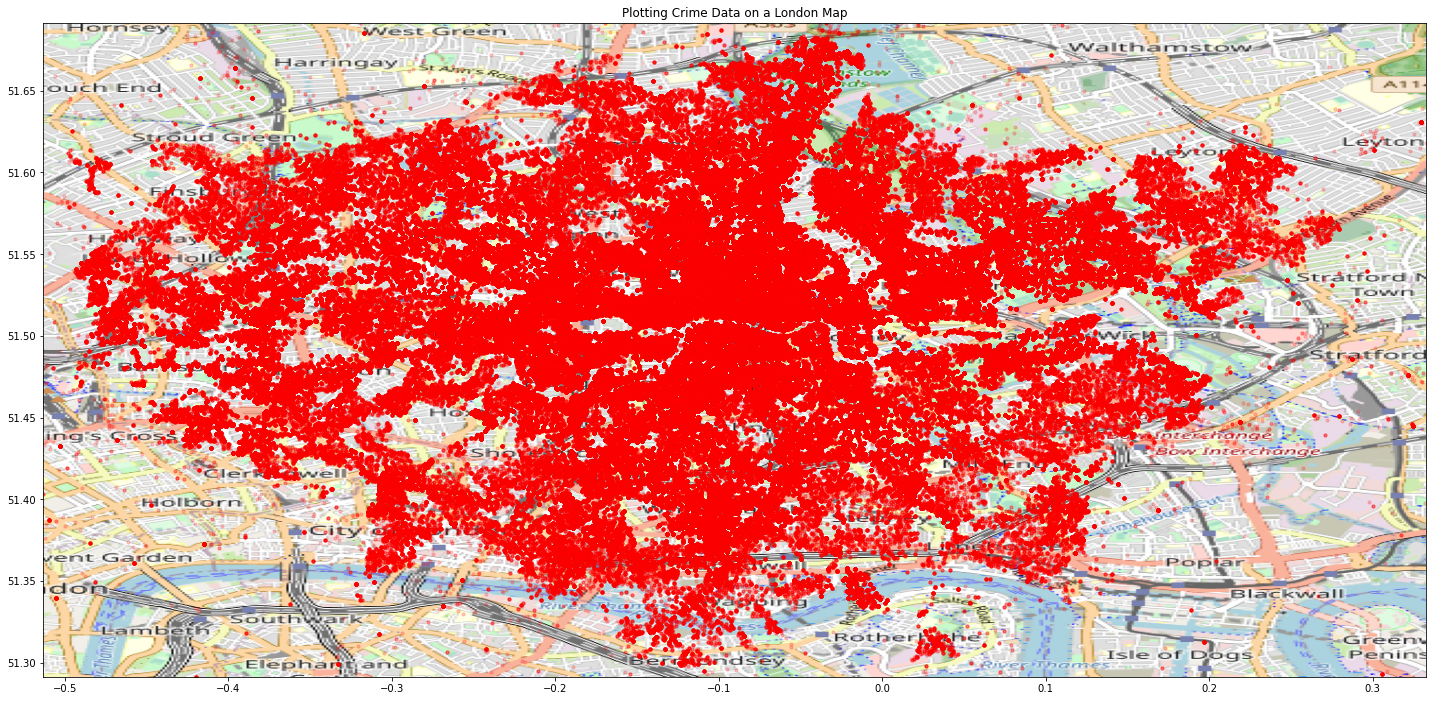

In [163]:
# Scatter Map depicting the coordinates of each crime
fig, ax = plt.subplots(figsize = (20,15))
ax.scatter(df.Longitude, df.Latitude, zorder=1, alpha= 0.2, c='r', s=10)
ax.set_title('Plotting Crime Data on a London Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(map_m, zorder=0, extent = BBox, aspect= 'equal')

In [164]:
from IPython.core.display import HTML
def multi_table(table_list):
    ''' Accepts a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>')

In [165]:
data_sum = {var: pd.DataFrame(df[var].value_counts()) 
              for var in {'Crime type', 'Month', 'Last outcome category'}}
multi_table([data_sum['Crime type'].style.background_gradient(cmap='spring'),data_sum['Month'].style.background_gradient(cmap='summer'),data_sum['Last outcome category'].style.background_gradient(cmap='winter')])

